In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline








from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split






from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv(r"kidney_disease.csv")

In [3]:
df.shape

(400, 26)

In [71]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0   0.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [73]:
df.describe().T

count        mean         std     min     25%     50%     75%      max
id    400.0  199.500000  115.614301   0.000   99.75  199.50  299.25  399.000
age   391.0   51.483376   17.169714   2.000   42.00   55.00   64.50   90.000
bp    388.0   76.082474   14.736739   0.000   70.00   80.00   80.00  180.000
sg    353.0    1.017408    0.005717   1.005    1.01    1.02    1.02    1.025
al    354.0    1.016949    1.352679   0.000    0.00    0.00    2.00    5.000
su    351.0    0.450142    1.099191   0.000    0.00    0.00    0.00    5.000
bgr   356.0  148.036517   79.281714  22.000   99.00  121.00  163.00  490.000
bu    381.0   57.425722   50.503006   1.500   27.00   42.00   66.00  391.000
sc    383.0    3.072454    5.741126   0.400    0.90    1.30    2.80   76.000
sod   313.0  137.528754   10.408752   4.500  135.00  138.00  142.00  163.000
pot   312.0    4.627244    3.193904   2.500    3.80    4.40    4.90   47.000
hemo  348.0   12.474713    3.040816   0.000   10.30   12.65   15.00   17.800

In [74]:
df.drop("id", axis=1, inplace=True)

# Checking all  the unique values of the columns and preprocessing

In [75]:
def preprocessing():
    for i in df.columns:
        print(i)
        print()
        print(df[i].unique())
        print("***************"*5)
        
preprocessing()

age

[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
***************************************************************************
bp

[ 80.  50.  70.   0.  90.  nan 100.  60. 110. 140. 180. 120.]
***************************************************************************
sg

[1.02  1.01  1.005 1.015   nan 1.025]
***************************************************************************
al

[ 1.  4.  2.  3.  0. nan  5.]
***************************************************************************
su

[ 0.  3.  4.  1. nan  2.  5.]
***************************************************************************
rbc

[nan 'normal' 'abnormal']
***************************************************************************
pc

['normal' 'abn

In [77]:
df["pcv"]=df["pcv"].apply(lambda x: np.nan if x=='\t?' else x)
df["pcv"]=df["pcv"].apply(lambda x: "43" if x=='\t43' else x)

df["wc"]=df["wc"].apply(lambda x:"6200" if x=='\t6200' else x)
df["wc"]=df["wc"].apply(lambda x: np.nan if x=='\t?' else x)
df["wc"]=df["wc"].apply(lambda x:"8400" if x=='\t8400' else x)

df["rc"]=df["rc"].apply(lambda x: np.nan if x=='\t?' else x)

df["dm"]=df["dm"].apply(lambda x: "no" if x=='\tno' else x)
df["dm"]=df["dm"].apply(lambda x: "yes" if x=='\tyes' else x)
df["dm"]=df["dm"].apply(lambda x: "yes" if x==' yes' else x)

df["cad"]=df["cad"].apply(lambda x: "no" if x=='\tno' else x)

df["classification"]=df["classification"].apply(lambda x: "ckd" if x=='ckd\t' else x)

In [78]:
preprocessing()

age

[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
***************************************************************************
bp

[ 80.  50.  70.   0.  90.  nan 100.  60. 110. 140. 180. 120.]
***************************************************************************
sg

[1.02  1.01  1.005 1.015   nan 1.025]
***************************************************************************
al

[ 1.  4.  2.  3.  0. nan  5.]
***************************************************************************
su

[ 0.  3.  4.  1. nan  2.  5.]
***************************************************************************
rbc

[nan 'normal' 'abnormal']
***************************************************************************
pc

['normal' 'abn

# Changing the type of columns

In [79]:
#"pcv, wc, rc" --> change to float from object

for i in ["pcv", "wc", "rc"]:
    df[i] = df[i].astype("float")
    
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

# Missing value:

In [80]:
def null_check():
    null=pd.DataFrame(df.isnull().sum()/len(df), columns=["null percent"])
    print(null)
    
null_check()

                null percent
age                   0.0225
bp                    0.0300
sg                    0.1175
al                    0.1150
su                    0.1225
rbc                   0.3800
pc                    0.1625
pcc                   0.0100
ba                    0.0100
bgr                   0.1100
bu                    0.0475
sc                    0.0425
sod                   0.2175
pot                   0.2200
hemo                  0.1300
pcv                   0.1775
wc                    0.2650
rc                    0.3275
htn                   0.0050
dm                    0.0050
cad                   0.0050
appet                 0.0025
pe                    0.0025
ane                   0.0025
classification        0.0000


In [81]:
#Filling the missing values by median and mode

for i in df.select_dtypes(exclude="object").columns:
    df[i].fillna(df[i].median(), inplace=True)
    
    
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [82]:
null_check()

                null percent
age                      0.0
bp                       0.0
sg                       0.0
al                       0.0
su                       0.0
rbc                      0.0
pc                       0.0
pcc                      0.0
ba                       0.0
bgr                      0.0
bu                       0.0
sc                       0.0
sod                      0.0
pot                      0.0
hemo                     0.0
pcv                      0.0
wc                       0.0
rc                       0.0
htn                      0.0
dm                       0.0
cad                      0.0
appet                    0.0
pe                       0.0
ane                      0.0
classification           0.0


In [84]:
df.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0   0.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0  121.0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1  121.0  ...  38.0  6000.0  4.8   no   no   no   good   no   no   
2  423.0  ...  31.0  7500.0  4.8   no  yes   no   poor   no  yes   
3  117.0  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4  106.0  ...  35.0  7300.0  4.6   no   no   no   good   no   no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  

[5 rows x 25 columns]

# Encoding

In [85]:
df_cat=df.select_dtypes(include=object)

In [86]:
df_cat

rbc        pc         pcc          ba  htn   dm cad appet   pe  ane  \
0    normal    normal  notpresent  notpresent  yes  yes  no  good   no   no   
1    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
2    normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes   
3    normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes   
4    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
..      ...       ...         ...         ...  ...  ...  ..   ...  ...  ...   
395  normal    normal  notpresent  notpresent   no   no  no  good   no   no   
396  normal    normal  notpresent  notpresent   no   no  no  good   no   no   
397  normal    normal  notpresent  notpresent   no   no  no  good   no   no   
398  normal    normal  notpresent  notpresent   no   no  no  good   no   no   
399  normal    normal  notpresent  notpresent   no   no  no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 11 columns]

In [87]:
for i in df_cat:
    print("*******************",i,"*******************")
    print(df[i].value_counts())
    print("********"*5)
    
    


******************* rbc *******************
normal      353
abnormal     47
Name: rbc, dtype: int64
****************************************
******************* pc *******************
normal      324
abnormal     76
Name: pc, dtype: int64
****************************************
******************* pcc *******************
notpresent    358
present        42
Name: pcc, dtype: int64
****************************************
******************* ba *******************
notpresent    378
present        22
Name: ba, dtype: int64
****************************************
******************* htn *******************
no     253
yes    147
Name: htn, dtype: int64
****************************************
******************* dm *******************
no     263
yes    137
Name: dm, dtype: int64
****************************************
******************* cad *******************
no     366
yes     34
Name: cad, dtype: int64
****************************************
******************* appet ***************

In [88]:
for i in df_cat:
    df[i]=df[i].astype("category")
    df[i]=df[i].cat.codes

In [89]:
df.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv      wc  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  44.0  7800.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  38.0  6000.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...  31.0  7500.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0  6700.0   
4  51.0   0.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  35.0  7300.0   

    rc  htn  dm  cad  appet  pe  ane  classification  
0  5.2    1   1    0      0   0    0               0  
1  4.8    0   0    0      0   0    0               0  
2  4.8    0   1    0      1   0    1               0  
3  3.9    1   0    0      1   1    1               0  
4  4.6    0   0    0      0   0    0               0  

[5 rows x 25 columns]

# Imbalance treatment

In [90]:
df.classification.value_counts()/len(df)


# no imbalance treatment required

0    0.625
1    0.375
Name: classification, dtype: float64

# Feature scaling

In [91]:
x=df.drop("classification", axis=1)
y=df.classification

In [92]:
x.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  15.4  44.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  11.3  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2  32.0   
4  51.0   0.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6  35.0   

       wc   rc  htn  dm  cad  appet  pe  ane  
0  7800.0  5.2    1   1    0      0   0    0  
1  6000.0  4.8    0   0    0      0   0    0  
2  7500.0  4.8    0   1    0      1   0    1  
3  6700.0  3.9    1   0    0      1   1    1  
4  7300.0  4.6    0   0    0      0   0    0  

[5 rows x 24 columns]

In [93]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int8

In [94]:
sc=StandardScaler()
x_standard=sc.fit_transform(x)

# Correlation

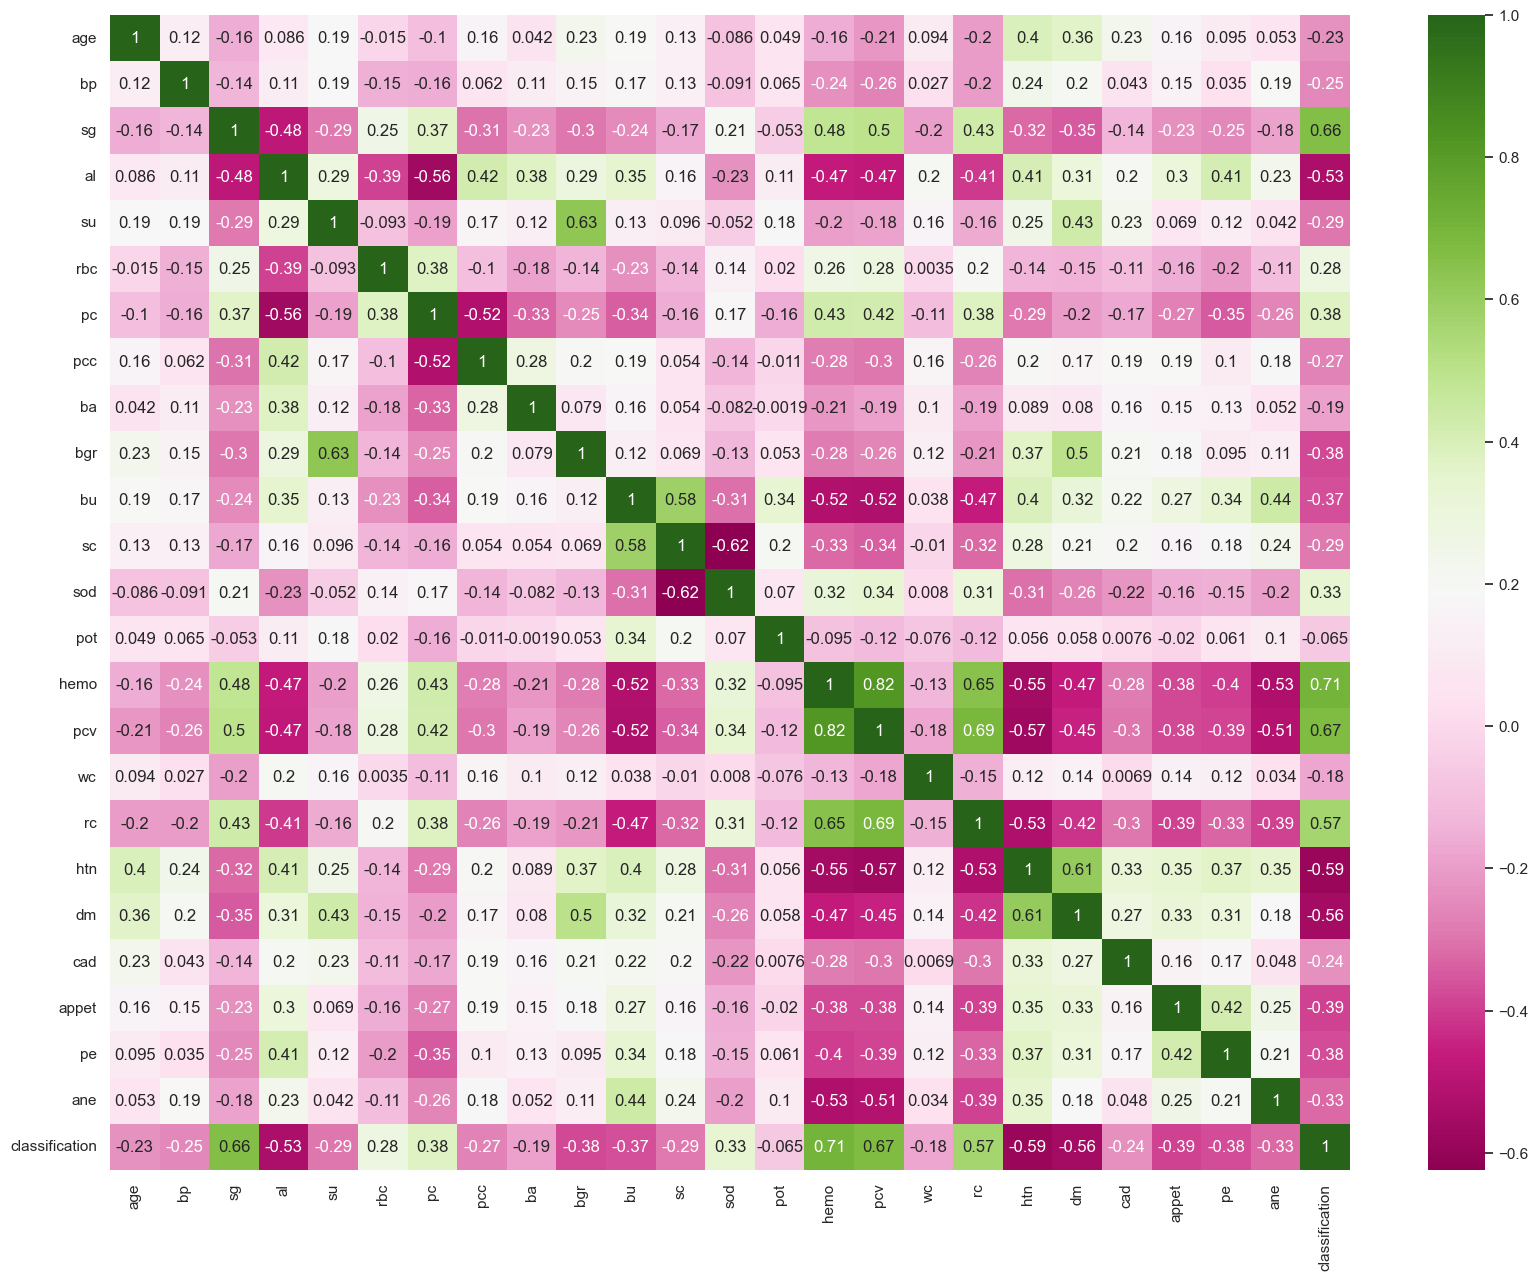

In [95]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(data=corr, annot=True, cmap="PiYG")
plt.show()

In [ ]:
# to find correlation greater than 0.75

In [96]:
list_c=[]
list_i=[]
list_corr=[]
for i in df.corr().columns:
    for j in df.corr().index:
        p=df.corr().loc[i,j]
        if (p>0.75 and p<1) or (p<-0.75):
            list_c.append(i)
            list_i.append(j)
            list_corr.append(p)
            list_corr=set(list_corr)
df_corr=pd.DataFrame(data={"var1":list_c, "var2": list_i, "correlation": list_corr})
df_corr

var1  var2  correlation
0  hemo   pcv     0.819063
1   pcv  hemo     0.819063

# Descriptive Statistics

In [98]:
df.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv      wc  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  44.0  7800.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  38.0  6000.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...  31.0  7500.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0  6700.0   
4  51.0   0.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  35.0  7300.0   

    rc  htn  dm  cad  appet  pe  ane  classification  
0  5.2    1   1    0      0   0    0               0  
1  4.8    0   0    0      0   0    0               0  
2  4.8    0   1    0      1   0    1               0  
3  3.9    1   0    0      1   1    1               0  
4  4.6    0   0    0      0   0    0               0  

[5 rows x 25 columns]

In [99]:
renamed_cols={'bp': 'blood_pressure', "sg": "specific_gravity", "al": 'albumin', 'su': 'sugar', 'pc': 'puss_cell', 'pcc': 'puss_cell_clump', 'ba': 'bacteria', 'bgr': 'blood_glucose_random', 'bu': 'blood_urea', 'sc': 'serum_creatinine', 'sod': 'sodium', 'pot': 'potassium', 'hemo': 'hemoglobin', 'pcv': 'packed_cell_volume', 'wc': 'wbc_count', "rc": 'rbc_count', 'htn': "hypertension", 'dm': 'diabetes_mellitus', 'cad': 'coronary_artery_disease', 'appet': 'appetite', 'pe': 'pedal_edema', 'ane': 'anemia'}
df.rename(columns=renamed_cols, inplace=True)

In [100]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  rbc  puss_cell  \
0  48.0            80.0             1.020      1.0    0.0    1          1   
1   7.0            50.0             1.020      4.0    0.0    1          1   
2  62.0            80.0             1.010      2.0    3.0    1          1   
3  48.0            70.0             1.005      4.0    0.0    1          0   
4  51.0             0.0             1.010      2.0    0.0    1          1   

   puss_cell_clump  bacteria  blood_glucose_random  ...  packed_cell_volume  \
0                0         0                 121.0  ...                44.0   
1                0         0                 121.0  ...                38.0   
2                0         0                 423.0  ...                31.0   
3                1         0                 117.0  ...                32.0   
4                0         0                 106.0  ...                35.0   

   wbc_count  rbc_count  hypertension  diabetes_mellitus  \
0     7800.0        5.2             1                  1   
1     6000.0        4.8             0                  0   
2     7500.0        4.8             0                  1   
3     6700.0        3.9             1                  0   
4     7300.0        4.6             0                  0   

   coronary_artery_disease  appetite  pedal_edema  anemia  classification  
0                        0         0            0       0               0  
1                        0         0            0       0               0  
2                        0         1            0       1               0  
3                        0         1            1       1               0  
4                        0         0            0       0               0  

[5 rows x 25 columns]

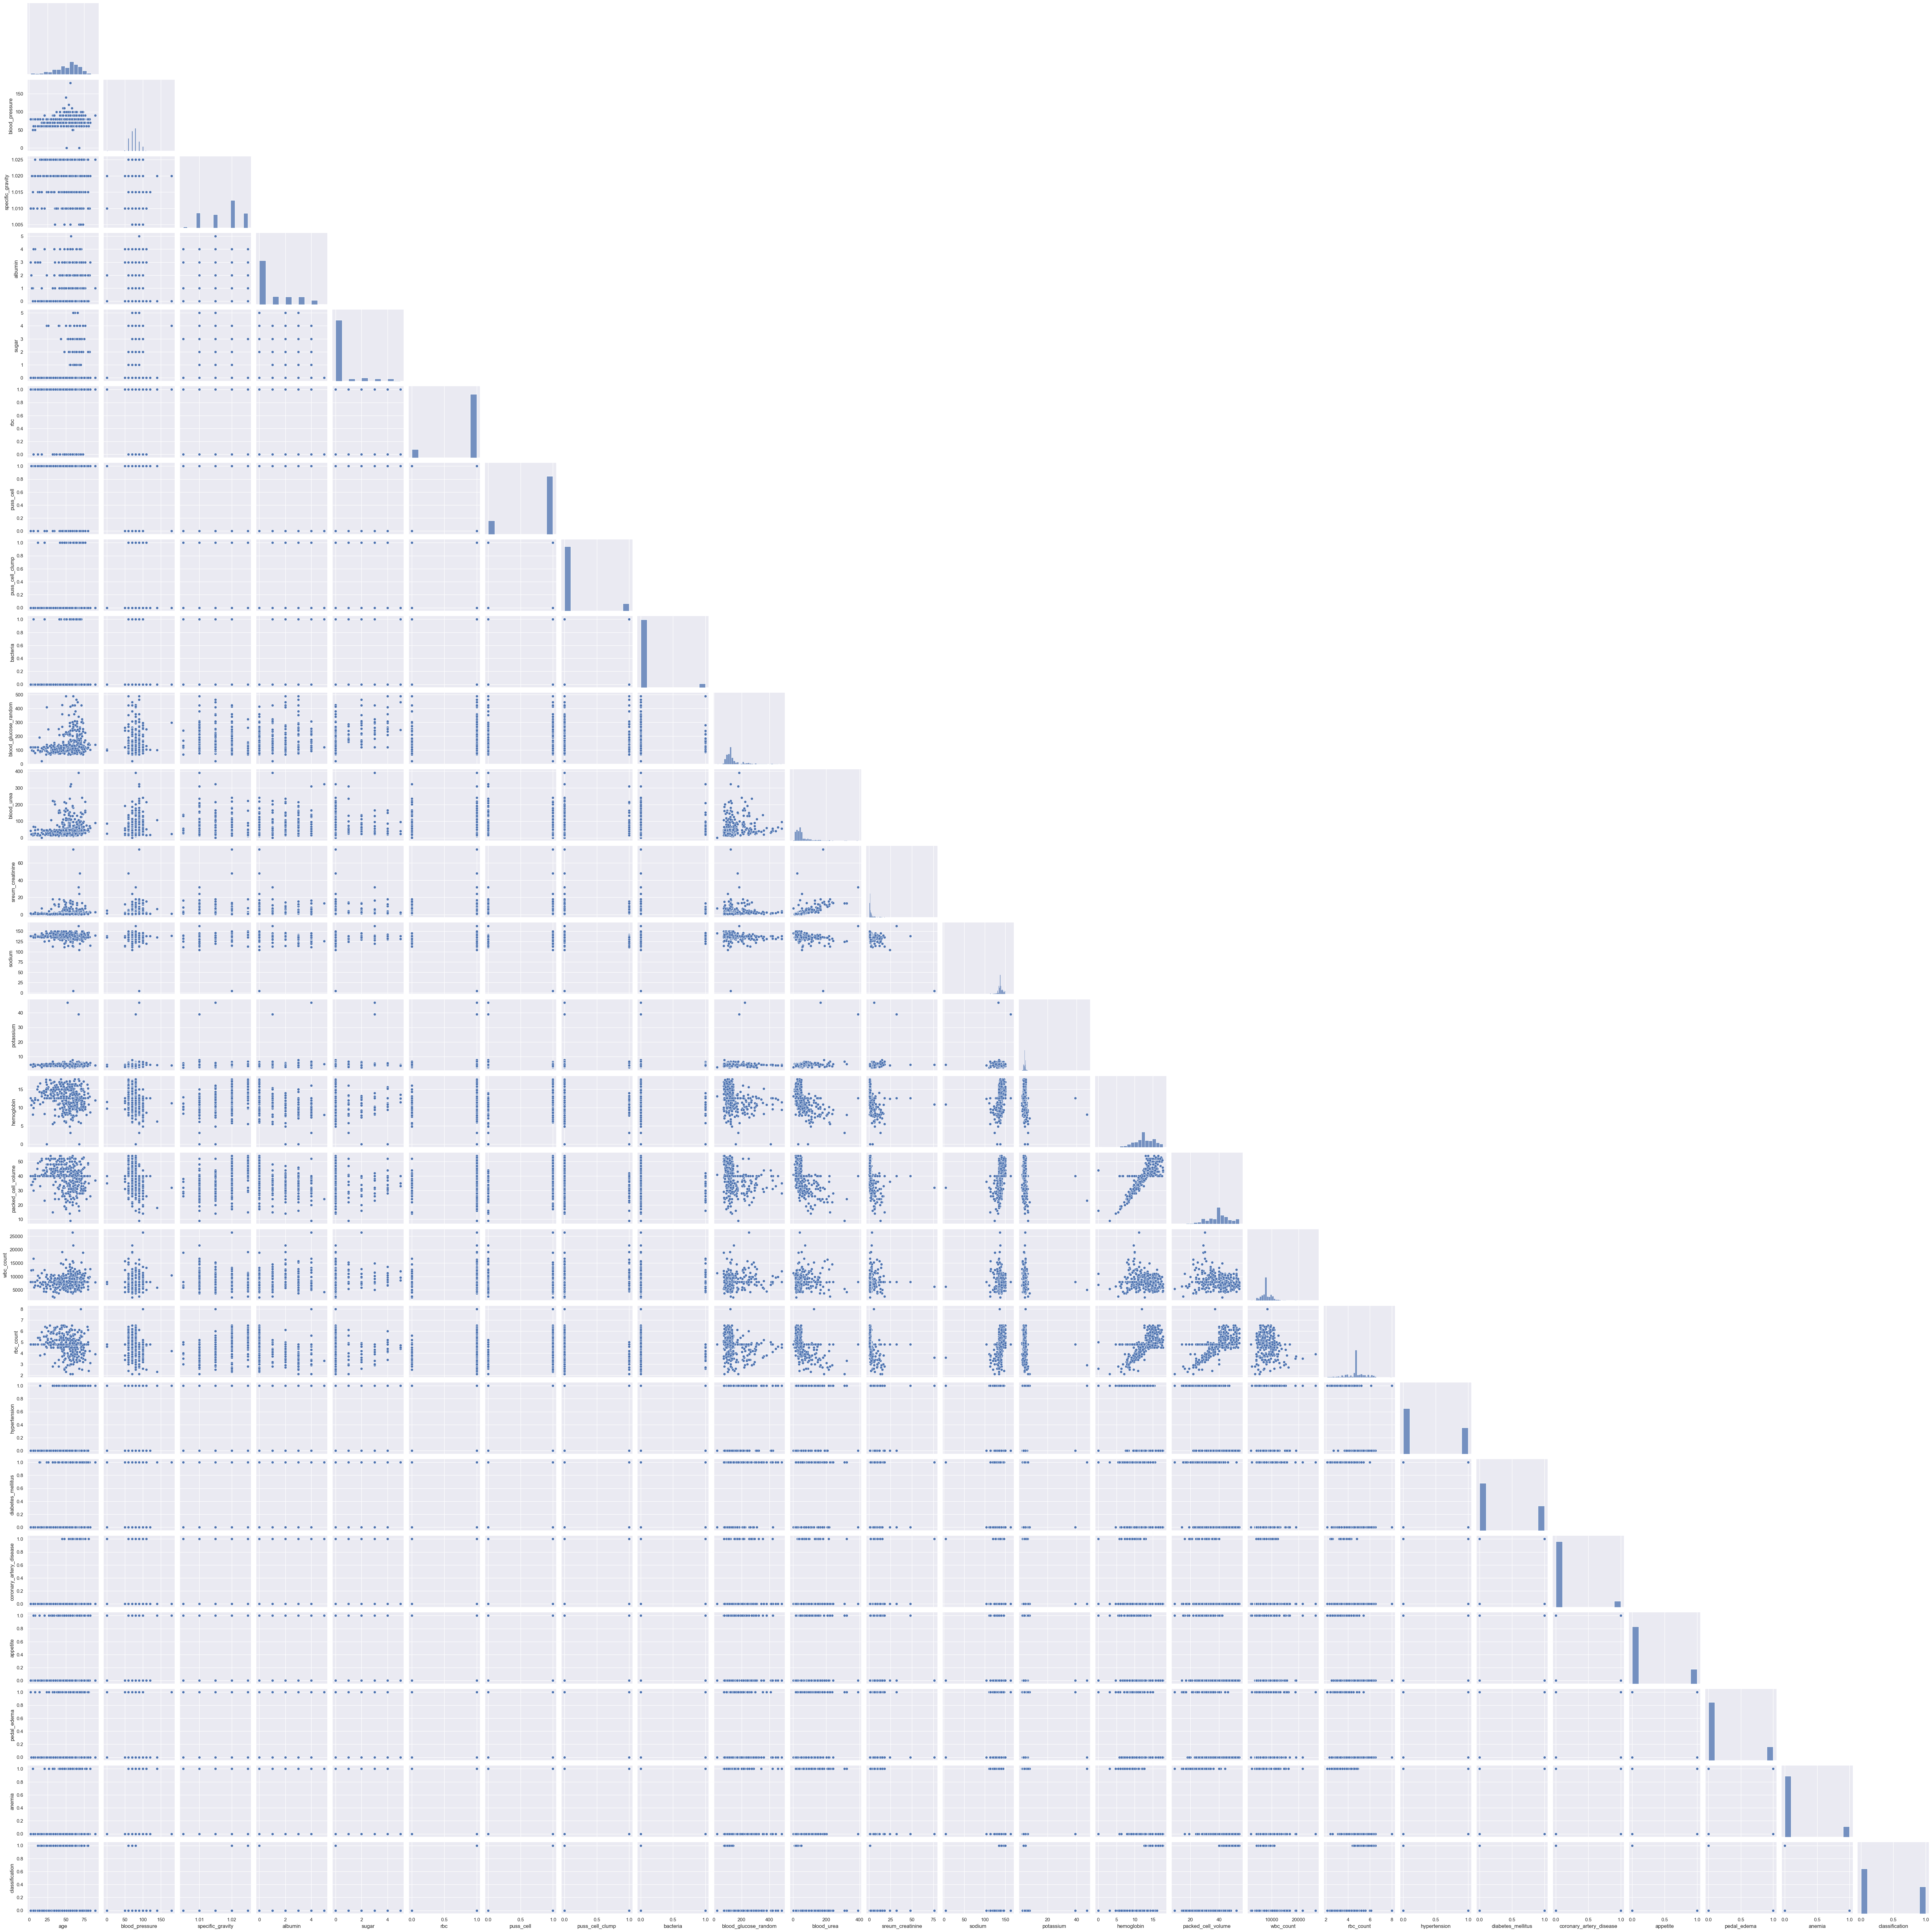

In [47]:
sns.pairplot(df, corner=True)
plt.show()

<Axes: xlabel='serum_creatinine', ylabel='Count'>

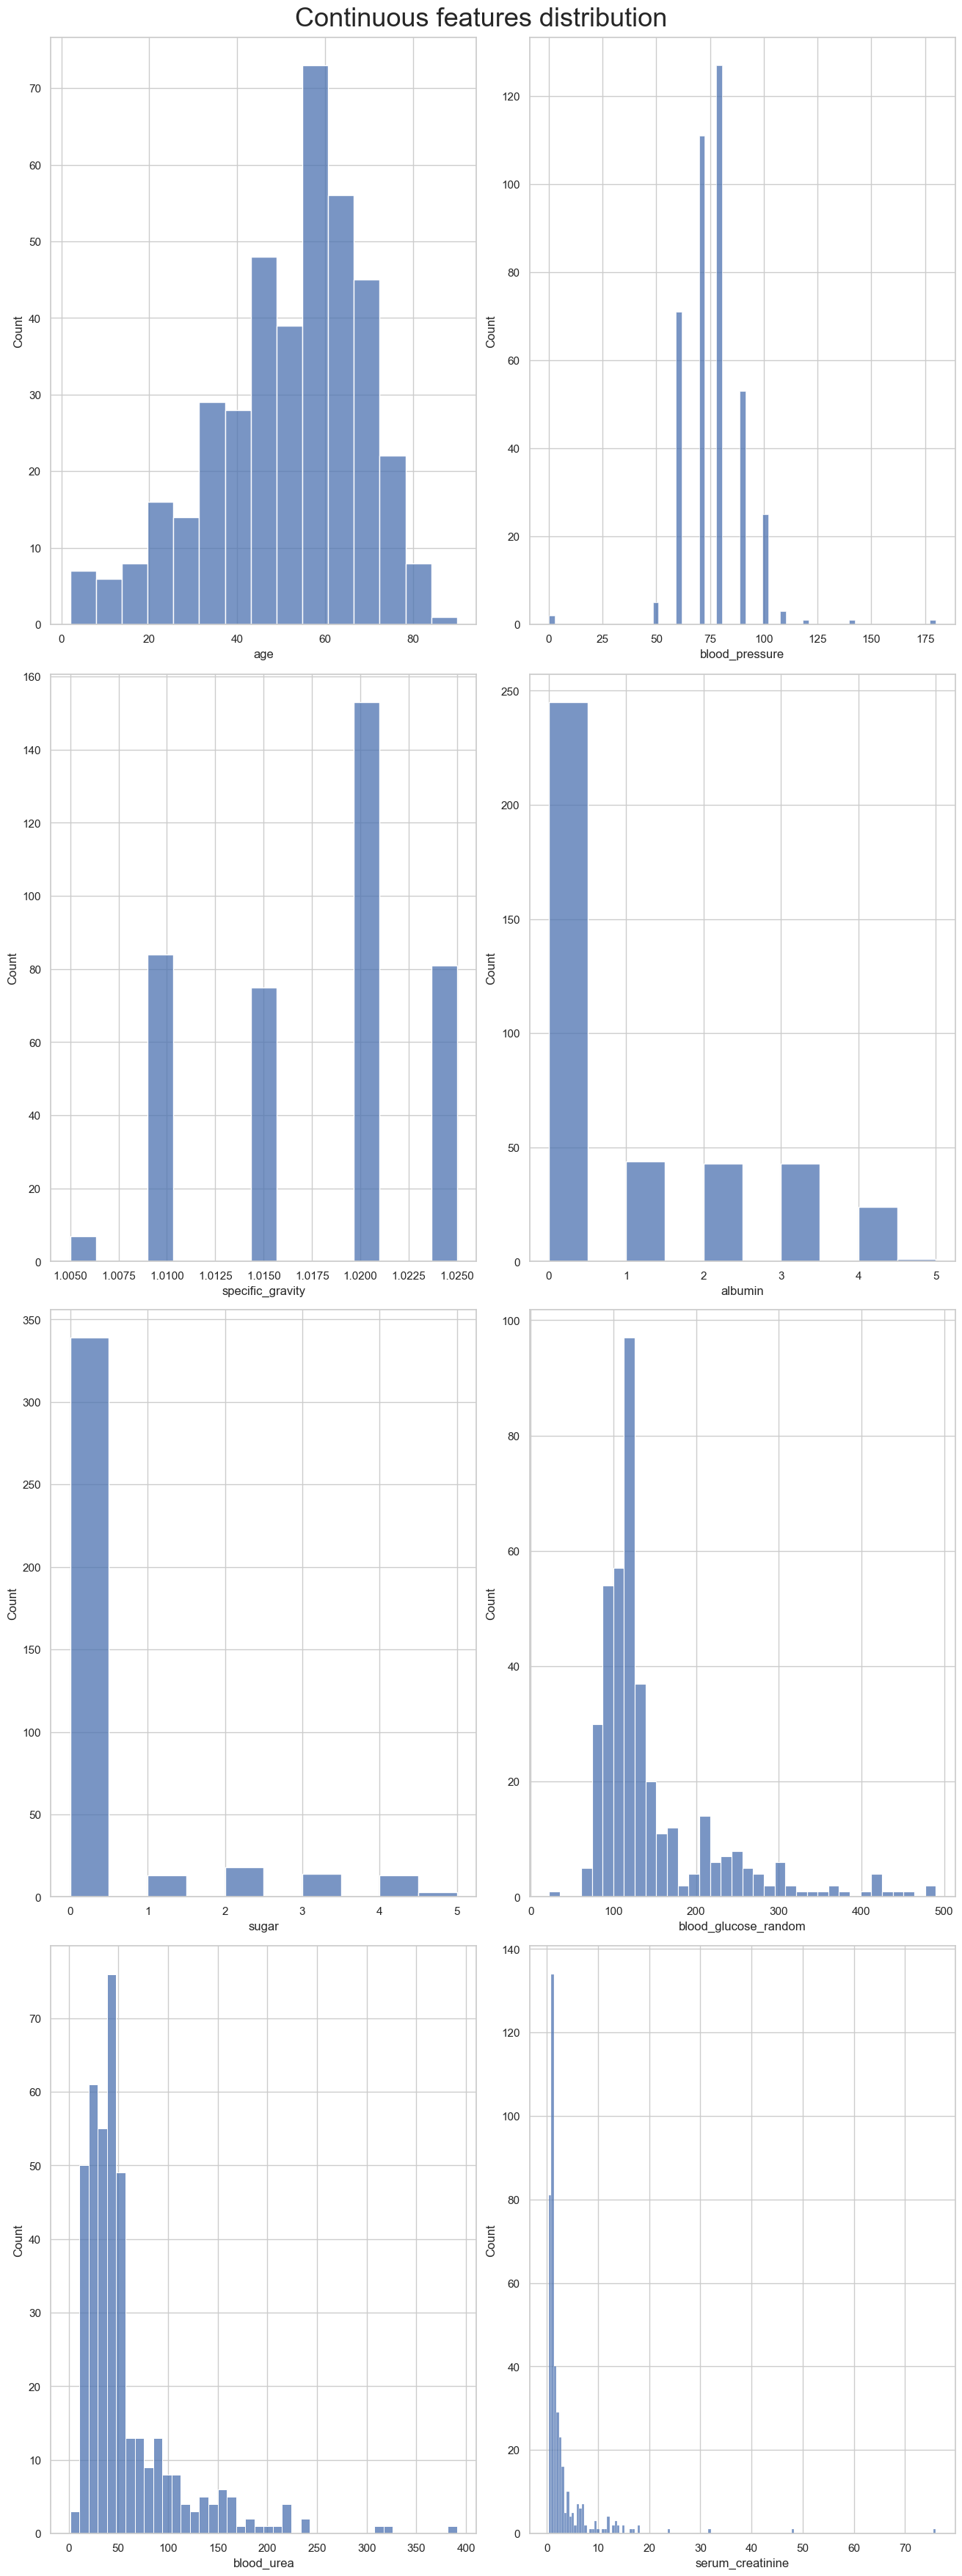

In [184]:
# Distribution of continuous features

fig, ax = plt.subplots(4,2, figsize=(15,12), constrained_layout=True)
fig.set_figheight(35)
fig.set_figwidth(13)

fig.suptitle("Continuous features distribution", fontsize=26)
sns.histplot(ax=ax[0,0], data=df, x=df['age'])
sns.histplot(ax=ax[0,1], data=df, x=df['blood_pressure'])
sns.histplot(ax=ax[1,0], data=df, x=df['specific_gravity'])
sns.histplot(ax=ax[1,1], data=df, x=df['albumin'])
sns.histplot(ax=ax[2,0], data=df, x=df['sugar'])
sns.histplot(ax=ax[2,1], data=df, x=df['blood_glucose_random'])
sns.histplot(ax=ax[3,0], data=df, x=df['blood_urea'])
sns.histplot(ax=ax[3,1], data=df, x=df['serum_creatinine'])
#plt.tight_layout()

#sns.histplot(ax=ax[2,1], data=df, x=df['rbc'])

<Axes: xlabel='rbc_count', ylabel='Count'>

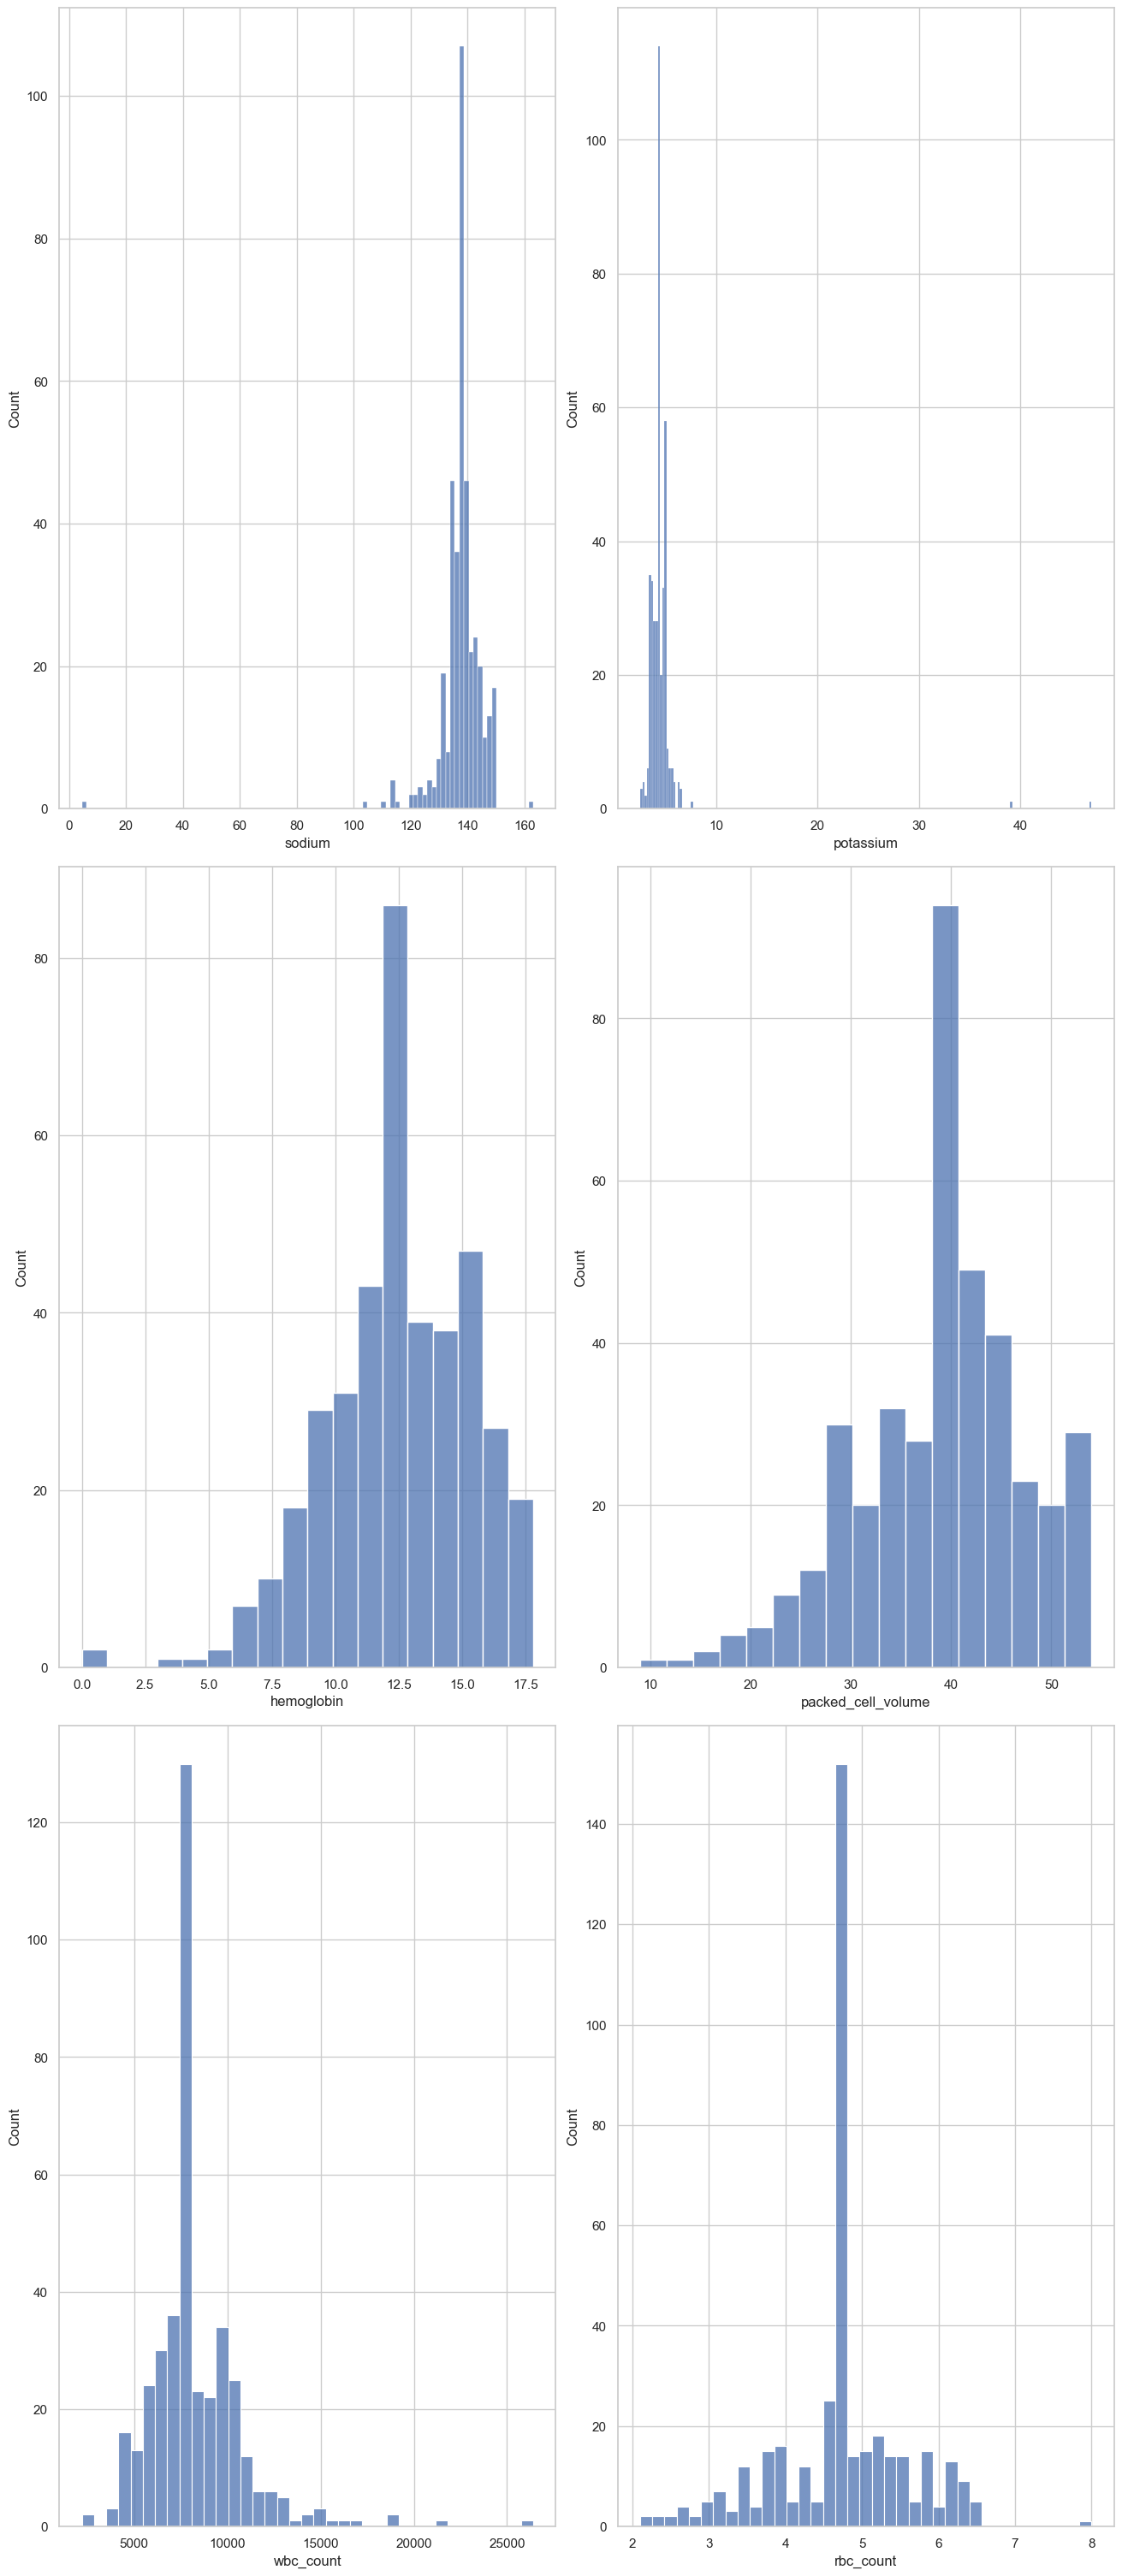

In [182]:
# Distribution of continuous features
fig, ax = plt.subplots(3,2, figsize=(15,12), constrained_layout=True)
fig.set_figheight(30)
fig.set_figwidth(13)

sns.histplot(ax=ax[0,0], data=df, x=df['sodium'])
sns.histplot(ax=ax[0,1], data=df, x=df['potassium'])
sns.histplot(ax=ax[1,0], data=df, x=df['hemoglobin'])
sns.histplot(ax=ax[1,1], data=df, x=df['packed_cell_volume'])
sns.histplot(ax=ax[2,0], data=df, x=df['wbc_count'])
sns.histplot(ax=ax[2,1], data=df, x=df['rbc_count'])
#plt.tight_layout()

- there are outliers found in sodium and potassium as the values are out of range: so I can cap the values

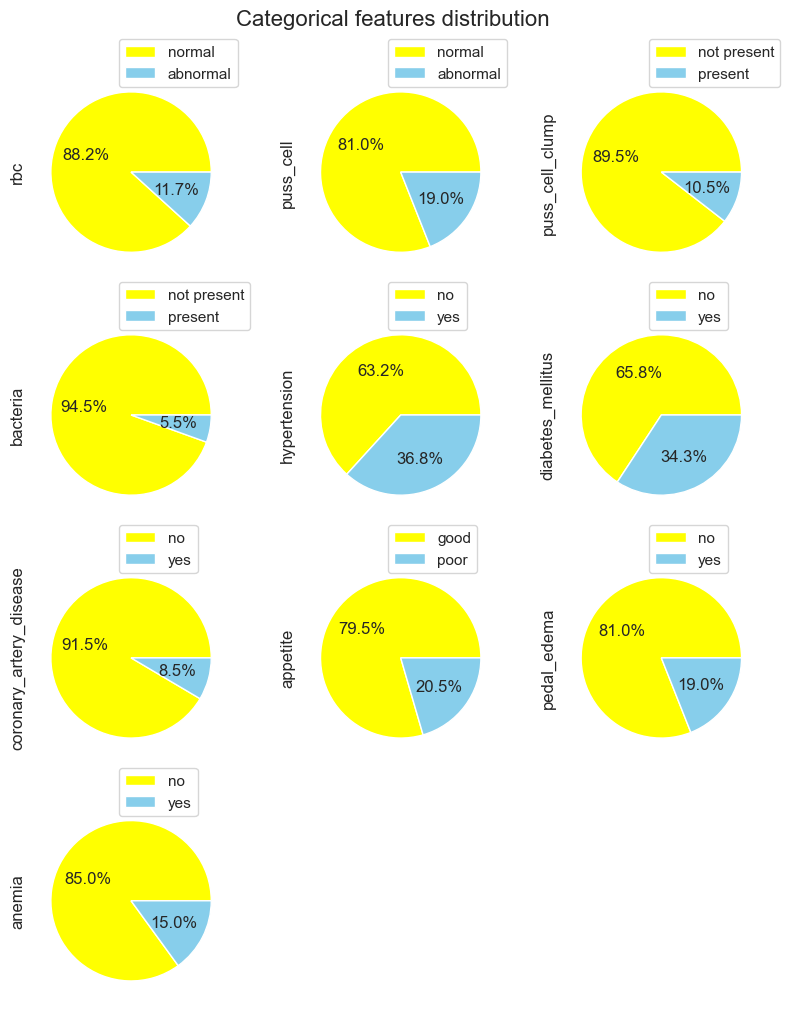

In [188]:
# distribution of categorical features:

sns.set(style="whitegrid")

fig, ax = plt.subplots(4,3, figsize=(6,6), constrained_layout=True)
fig.set_figheight(10)
fig.set_figwidth(8)

ax=ax.flatten() # to convert the 2d array shape of ax returned from plt.subplots fn into 1d array for easy iteration below

cols_to_plot=['rbc','puss_cell','puss_cell_clump','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pedal_edema','anemia']
custom_labels={'rbc': ['normal', 'abnormal'], 'puss_cell': ['normal', 'abnormal'],
              'puss_cell_clump': ['not present', 'present'], 'bacteria': ['not present', 'present'],
              'hypertension': ['no', 'yes'], 'diabetes_mellitus': ['no', 'yes'],
              'coronary_artery_disease': ['no', 'yes'], 'appetite': ['good', 'poor'],
              'pedal_edema': ['no', 'yes'], 'anemia': ['no', 'yes']}
for i, col in enumerate(cols_to_plot):
    df[col].value_counts().plot(ax=ax[i], kind='pie',labels=None, autopct='%1.1f%%', colors=['yellow', 'skyblue'])
#     plt.pie(x=df['diabetes_mellitus'].value_counts())
#     plt.show()
    for i, col in enumerate(custom_labels):
        ax[i].legend(custom_labels[col], bbox_to_anchor=(0.4,1.2), loc='upper left')
fig.delaxes(ax[10])
fig.delaxes(ax[11])
fig.suptitle("Categorical features distribution", fontsize=16)

#plt.tight_layout()
plt.show()

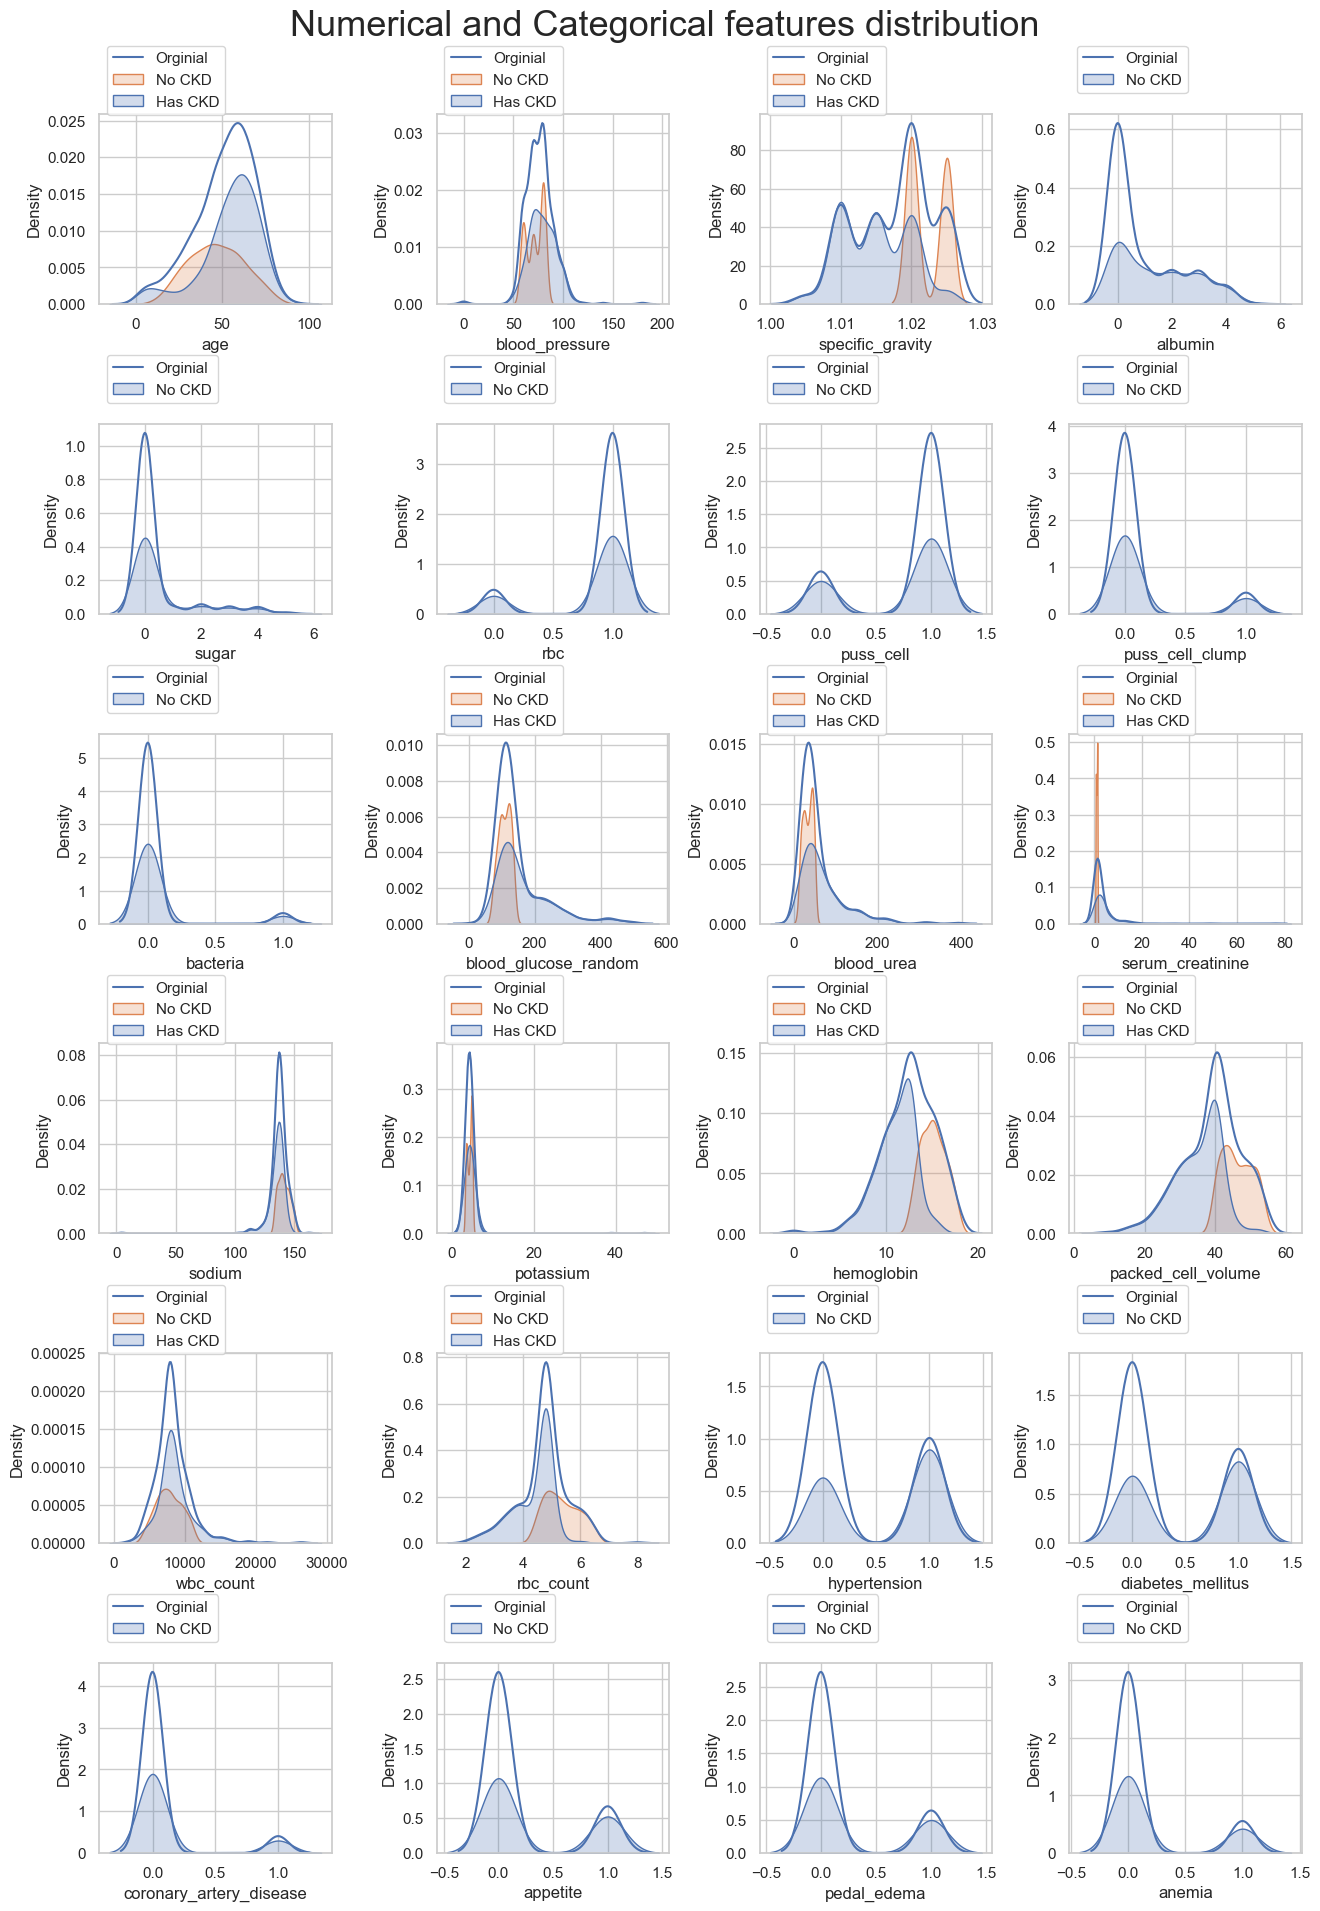

In [432]:
# classification of people having a kidney disease according to age
fig, ax = plt.subplots(6,4, figsize=(7,7), constrained_layout=True)
fig.set_figheight(19)
fig.set_figwidth(13)

ax=ax.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.kdeplot(ax=ax[i], data=df, x=df[col])
#    sns.kdeplot(ax=ax[i], data=df, x=df[col], hue='classification', fill=True, legend=None, palette='crest')
    sns.kdeplot(ax=ax[i], data=df, x=df[col], hue='classification', fill=True, legend=True)

    #    plt.legend(labels=['Orginial','Has disease', 'No disease'])
    ax[i].legend(['Orginial', 'No CKD', 'Has CKD'], bbox_to_anchor=(0,1.4), loc='upper left')

#    ax[i].legend({0:'No CKD', 1:'Has CKD'}, bbox_to_anchor=(0,1.4), loc='upper left')

fig.suptitle("Numerical and Categorical features distribution", fontsize=26)
plt.show()

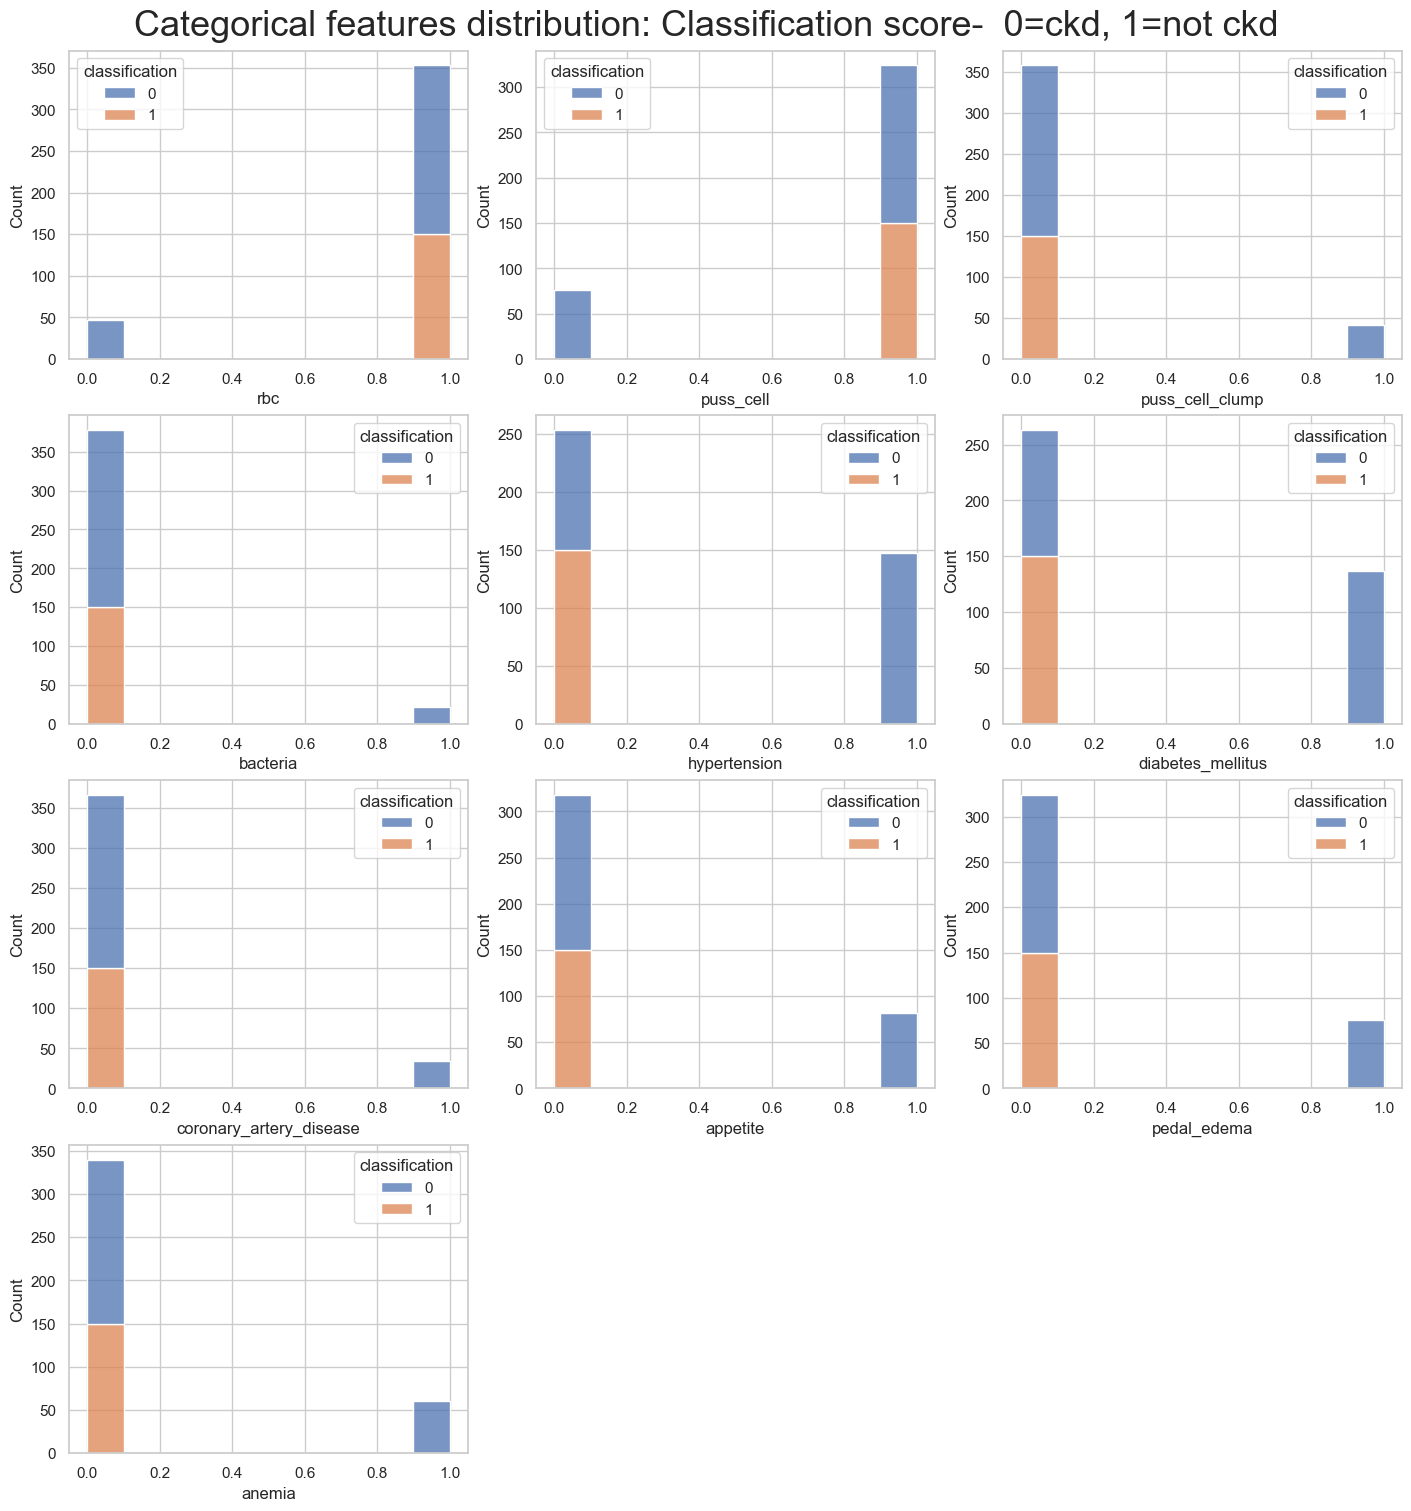

In [430]:
# plotting stacked count plot:


fig, ax = plt.subplots(4,3, figsize=(2,2), constrained_layout=True)
fig.set_figheight(15)
fig.set_figwidth(14)

ax=ax.flatten()

cols_cat=['rbc','puss_cell','puss_cell_clump','bacteria','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pedal_edema','anemia']
for i, col in enumerate(cols_cat):
    sns.histplot(ax=ax[i], data=df, x=df[col], hue='classification', color=['orange', 'pink'], multiple='stack' )

fig.delaxes(ax[10])
fig.delaxes(ax[11])    
fig.suptitle("Categorical features distribution: Classification score-  0=ckd, 1=not ckd", fontsize=26)
    
plt.show()

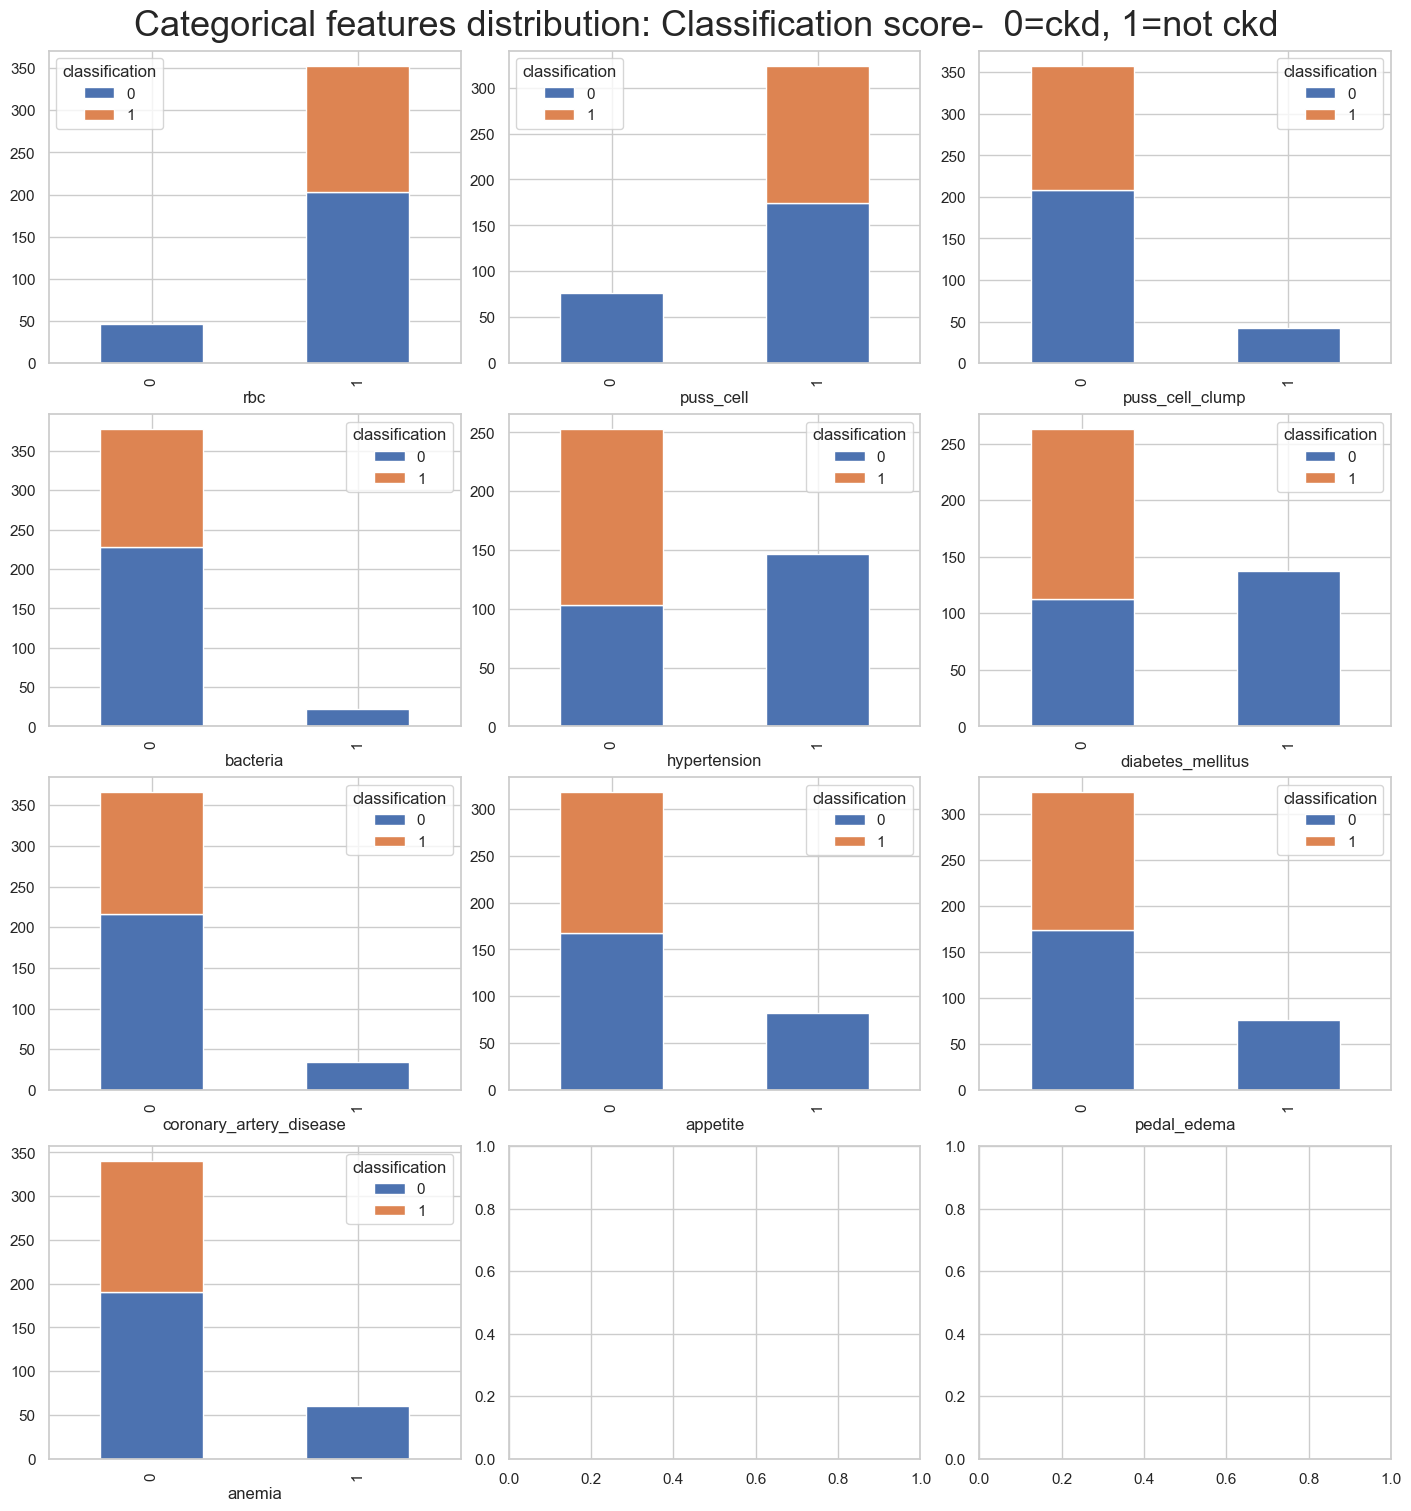

In [429]:
# the above bar plot can also be plotted using pd.plot().bar()


fig, ax = plt.subplots(4,3, figsize=(2,2), constrained_layout=True)
fig.set_figheight(15)
fig.set_figwidth(14)

ax=ax.flatten()

for i, col in enumerate(cols_cat):
#    df.groupby(col)[col].count()
    x=df.groupby([col, 'classification'])[col].count().unstack()
    x.plot(ax=ax[i], kind='bar', stacked=True)
    fig.suptitle("Categorical features distribution: Classification score-  0=ckd, 1=not ckd", fontsize=26)
    ax[i].set_xlabel(col)



plt.show()

In [405]:
# the above stacked bar plot of all the cols can be also done using crosstab function of pandas


# so here stacked plot with 3 categorical cols is made. 


pd.crosstab(df['rbc'], [df['classification'], df['albumin']])



classification   0                        1
albumin        0.0 1.0 2.0 3.0 4.0 5.0  0.0
rbc                                        
0                2  12  12  12   8   1    0
1               93  32  31  31  16   0  150

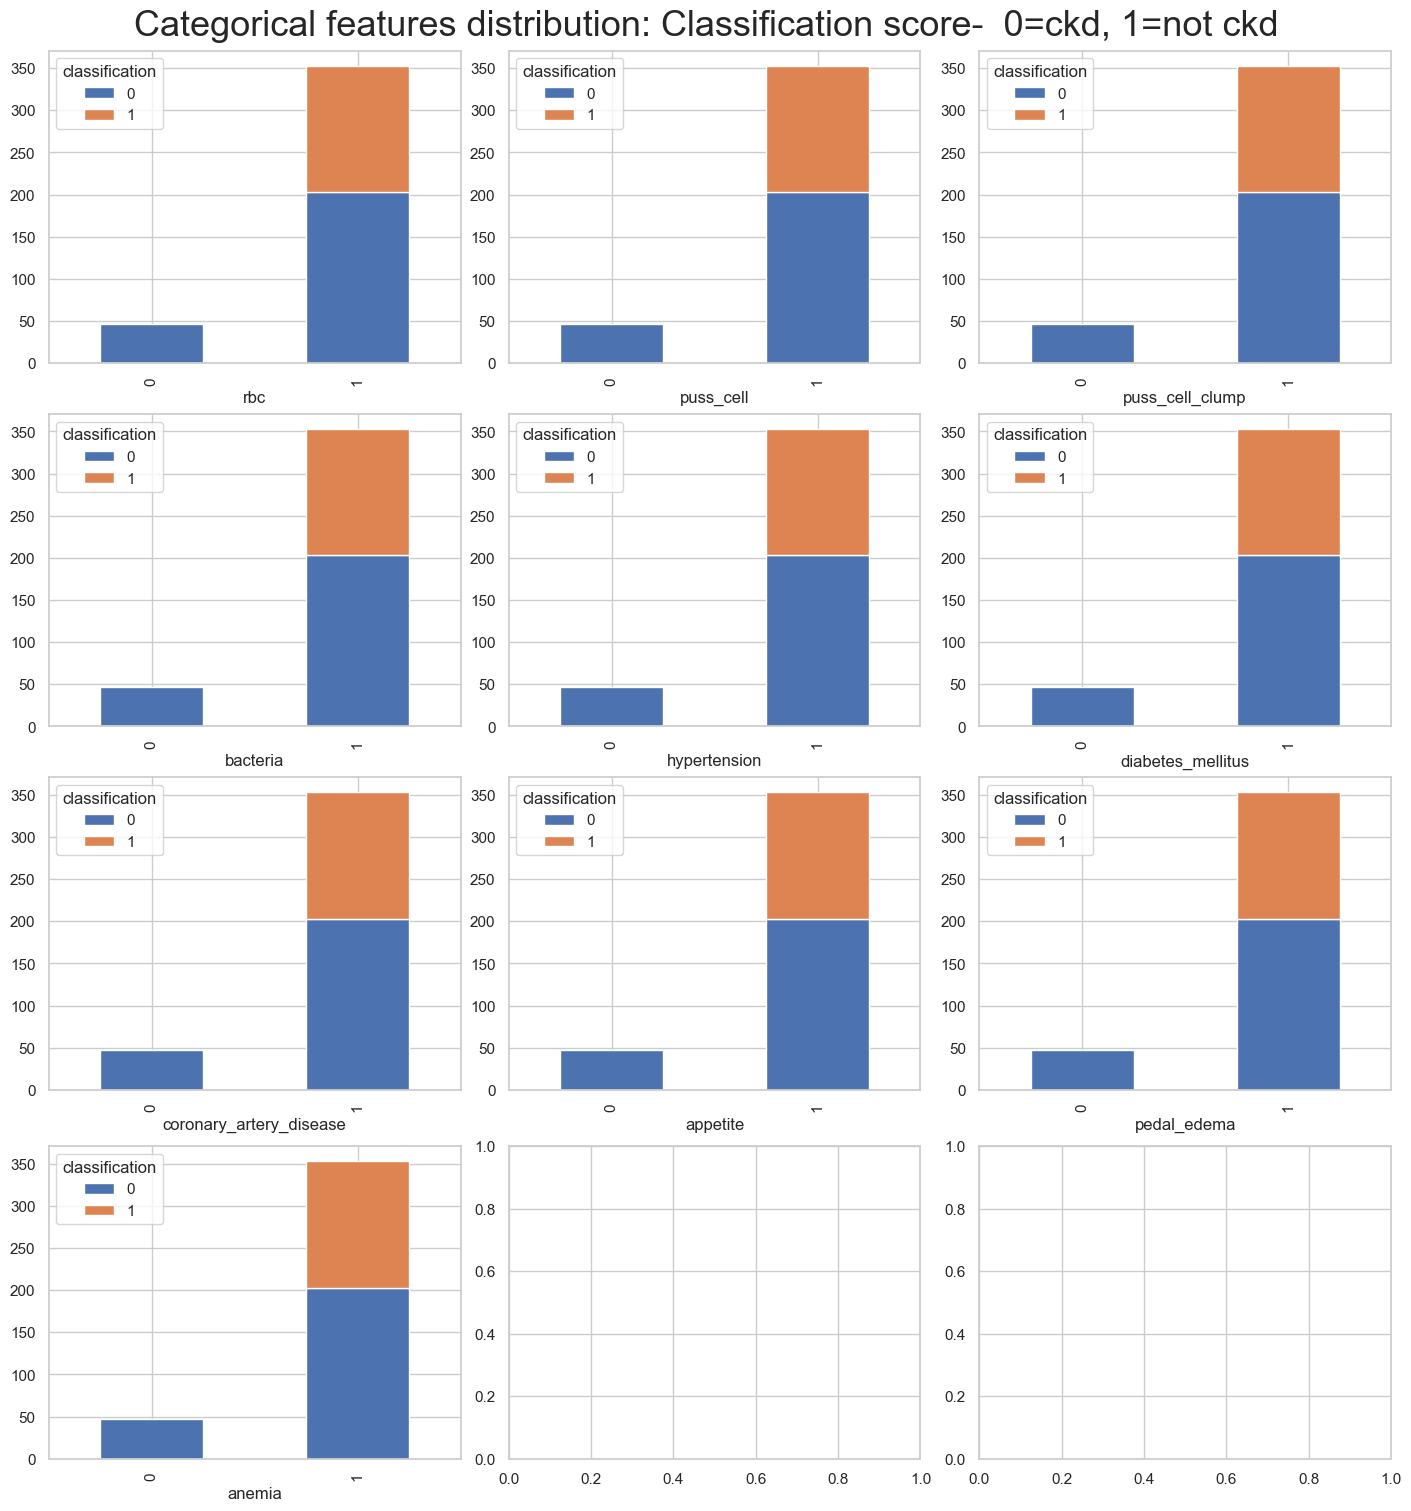

In [428]:
# crosstab with just 1 row and 1 col.

fig, ax = plt.subplots(4,3, figsize=(2,2), constrained_layout=True)
fig.set_figheight(15)
fig.set_figwidth(14)

ax=ax.flatten()

for i, col in enumerate(cols_cat):
    x=pd.crosstab(df['rbc'], df['classification'])
    x.plot(ax=ax[i], kind='bar', stacked=True)
    fig.suptitle("Categorical features distribution: Classification score-  0=ckd, 1=not ckd", fontsize=26)
    ax[i].set_xlabel(col)

plt.show()

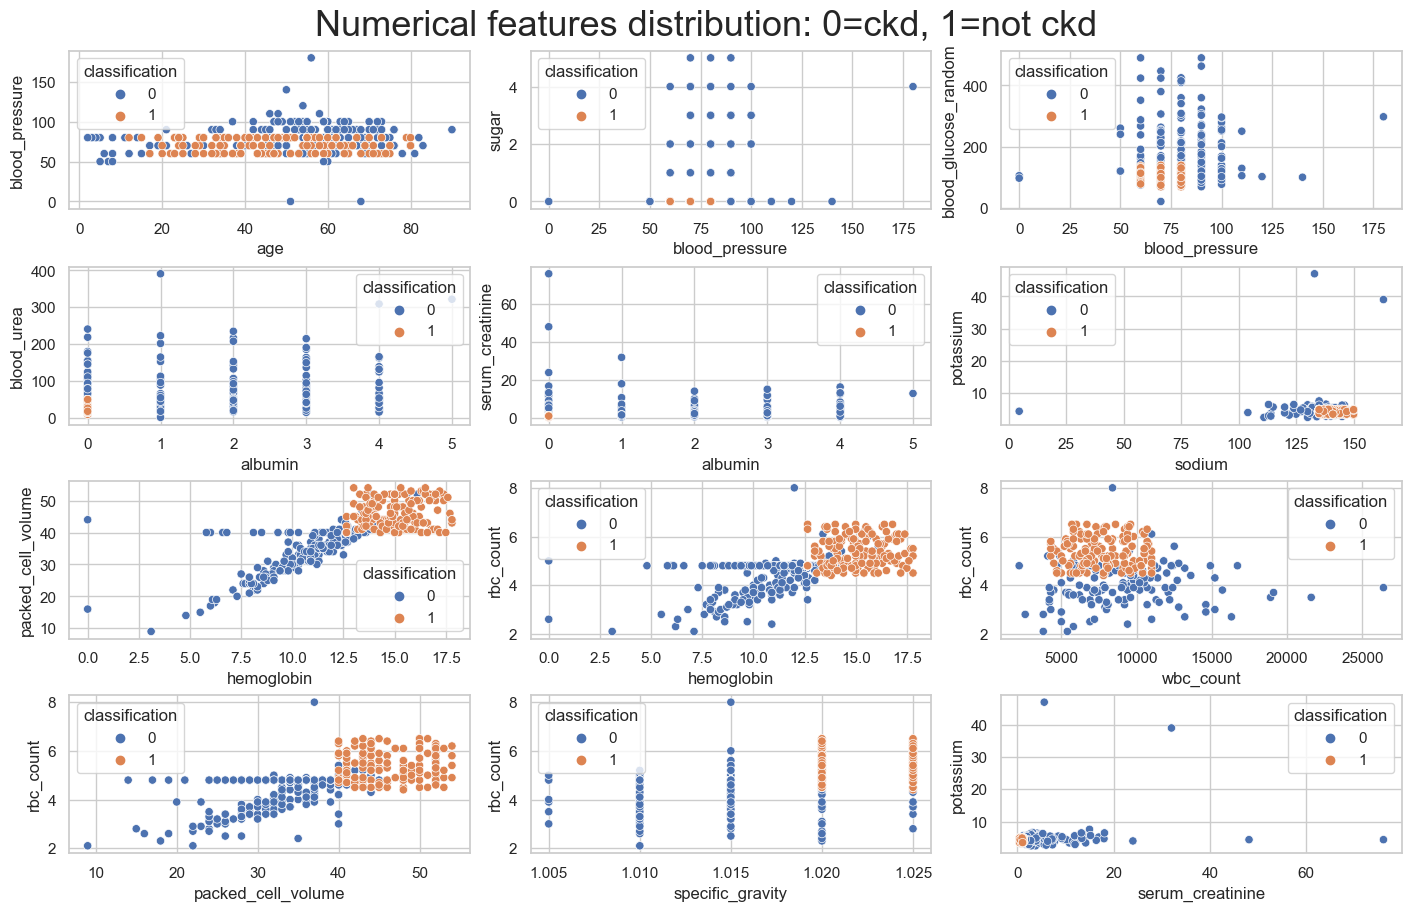

In [427]:
# scatter plots between numerical variables:


fig, ax = plt.subplots(4,3, figsize=(2,2), constrained_layout=True)
fig.set_figheight(9)
fig.set_figwidth(14)

ax=ax.flatten()
cols_num=['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'wbc_count', 'rbc_count']

# for i, col in enumerate(cols_num):
#     for j, col1 in enumerate(cols_num, start=i+1):   #range(i+1, len(cols_num)):



sns.scatterplot(ax=ax[0], data=df, x='age', y='blood_pressure', hue='classification', legend=True)
sns.scatterplot(ax=ax[1], data=df, x=df['blood_pressure'], y=df['sugar'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[2], data=df, x=df['blood_pressure'], y=df['blood_glucose_random'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[3], data=df, x=df['albumin'], y=df['blood_urea'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[4], data=df, x=df['albumin'], y=df['serum_creatinine'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[5], data=df, x=df['sodium'], y=df['potassium'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[6], data=df, x=df['hemoglobin'], y=df['packed_cell_volume'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[7], data=df, x=df['hemoglobin'], y=df['rbc_count'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[8], data=df, x=df['wbc_count'], y=df['rbc_count'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[9], data=df, x=df['packed_cell_volume'], y=df['rbc_count'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[10], data=df, x=df['specific_gravity'], y=df['rbc_count'], hue=df['classification'], legend=True)
sns.scatterplot(ax=ax[11], data=df, x=df['serum_creatinine'], y=df['potassium'], hue=df['classification'], legend=True)




fig.suptitle("Numerical features distribution: 0=ckd, 1=not ckd", fontsize=26)
plt.show()

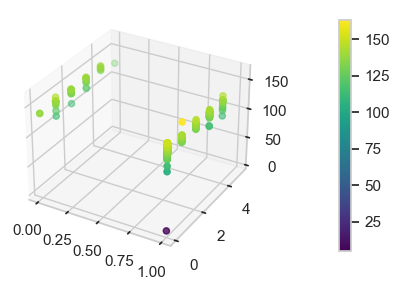

In [462]:
# 3d plots:

fig=plt.figure(figsize=(5,5))
ax=plt.axes(projection='3d')
#my_cmap=plt.get_cmap('hsv')
#c = np.arange(len(x)) / len(x)  # create some colors
sctt=ax.scatter(data=df, xs='rbc', ys='albumin', zs='sodium', c='sodium', cmap='viridis') #The colormap will be used to assign a color to each point based on its c value.
plt.colorbar(sctt, ax=ax, pad=0.2, shrink=0.6) #The pad parameter controls the spacing between the colorbar and the plot axes. The shrink parameter controls the size of the colorbar relative to its default size.
#cbar.set_label()
plt.show()




# Split the data into train and test

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, random_state=123, test_size=0.25, stratify=y)

## Building all the models at once


Evaluation Metrics for Logistic Regression
************************************************************************************************************************
Training Accuracy 1.0
****************
Test Accuracy 0.99
************************************************************************************************************************
For training data:


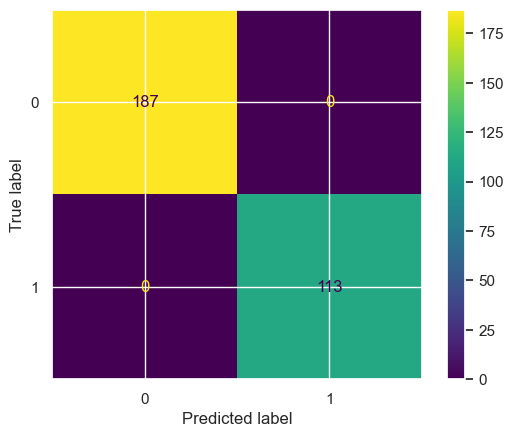

The classification data is: True Positives=113, False Positives=0, False Negatives=0, True Negatives=187
For testing data:


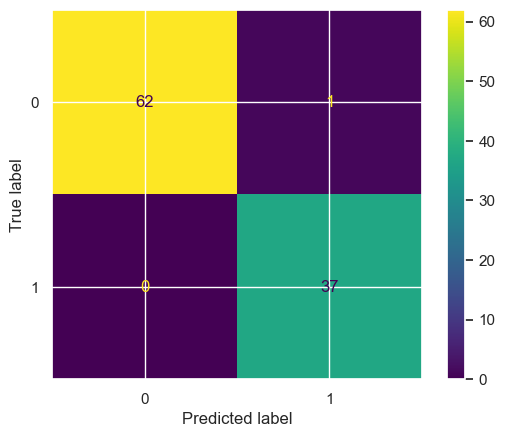

The classification data is: True Positives=37, False Positives=1, False Negatives=0, True Negatives=62
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       113

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

****************
****************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.97      1.00      0.99        37

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

****************
***********************************************************************

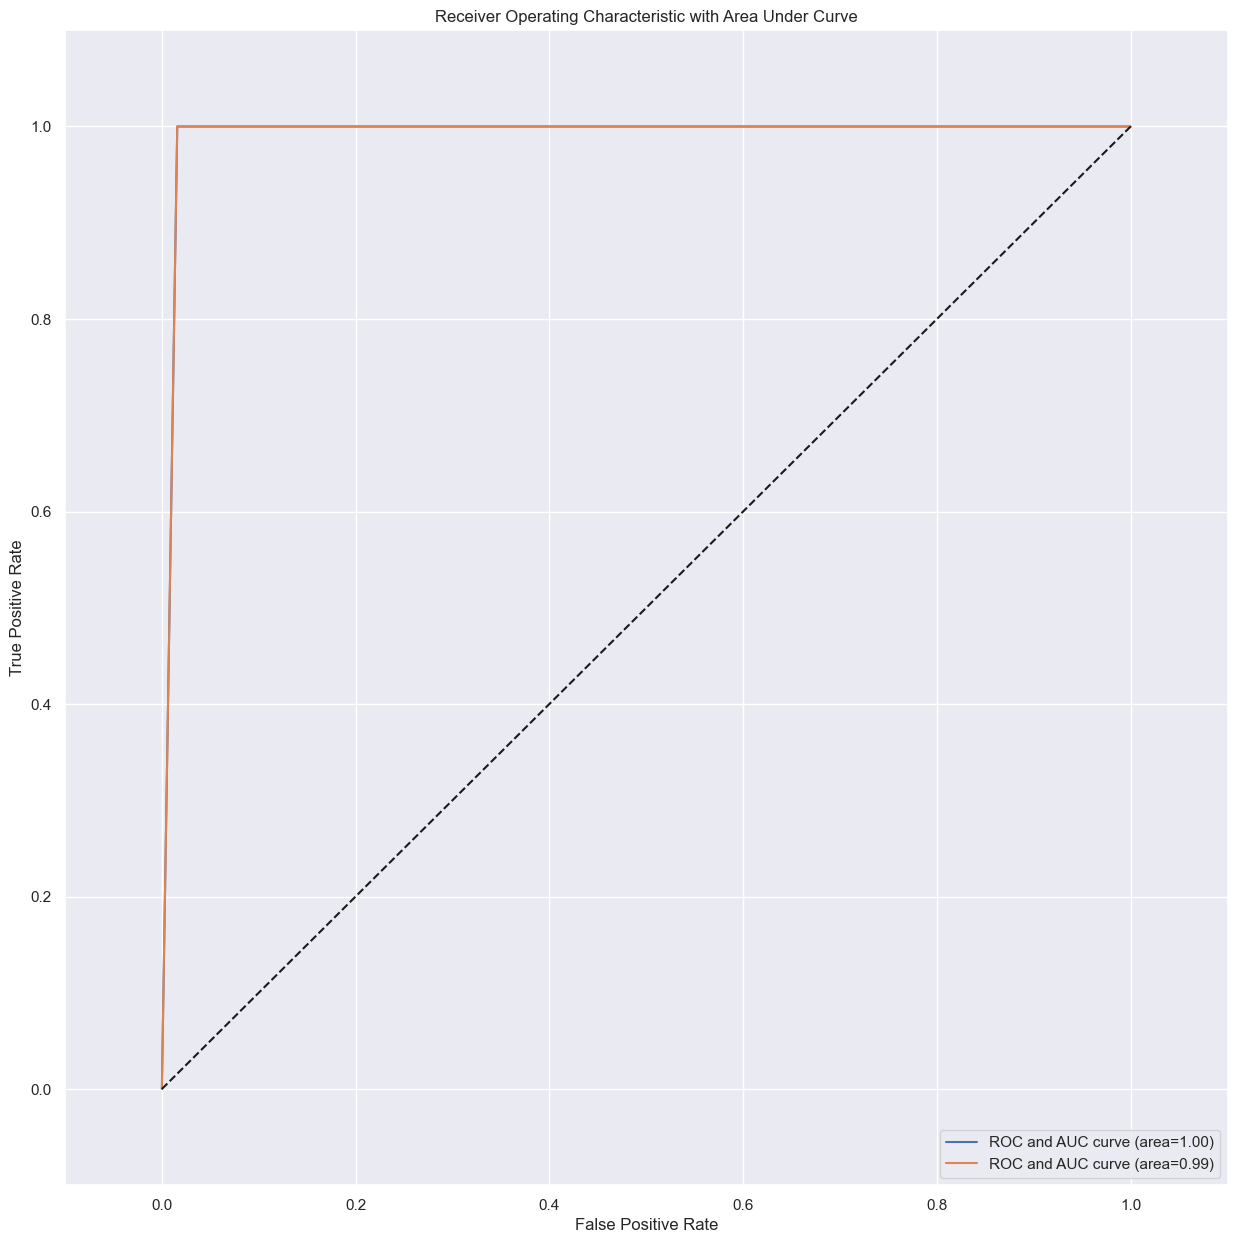

Training Avg Accuracy 0.9966666666666667

Test Avg Accuracy 0.9800000000000001
************************************************************************************************************************
Evaluation Metrics for Decision Tree Classifier
************************************************************************************************************************
Training Accuracy 1.0
****************
Test Accuracy 0.97
************************************************************************************************************************
For training data:


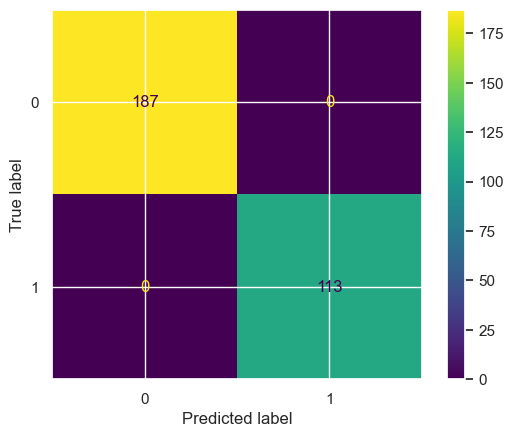

The classification data is: True Positives=113, False Positives=0, False Negatives=0, True Negatives=187
For testing data:


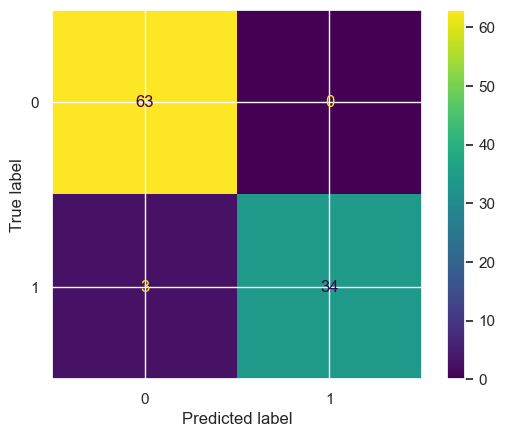

The classification data is: True Positives=34, False Positives=0, False Negatives=3, True Negatives=63
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       113

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

****************
****************
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.92      0.96        37

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

****************
***********************************************************************

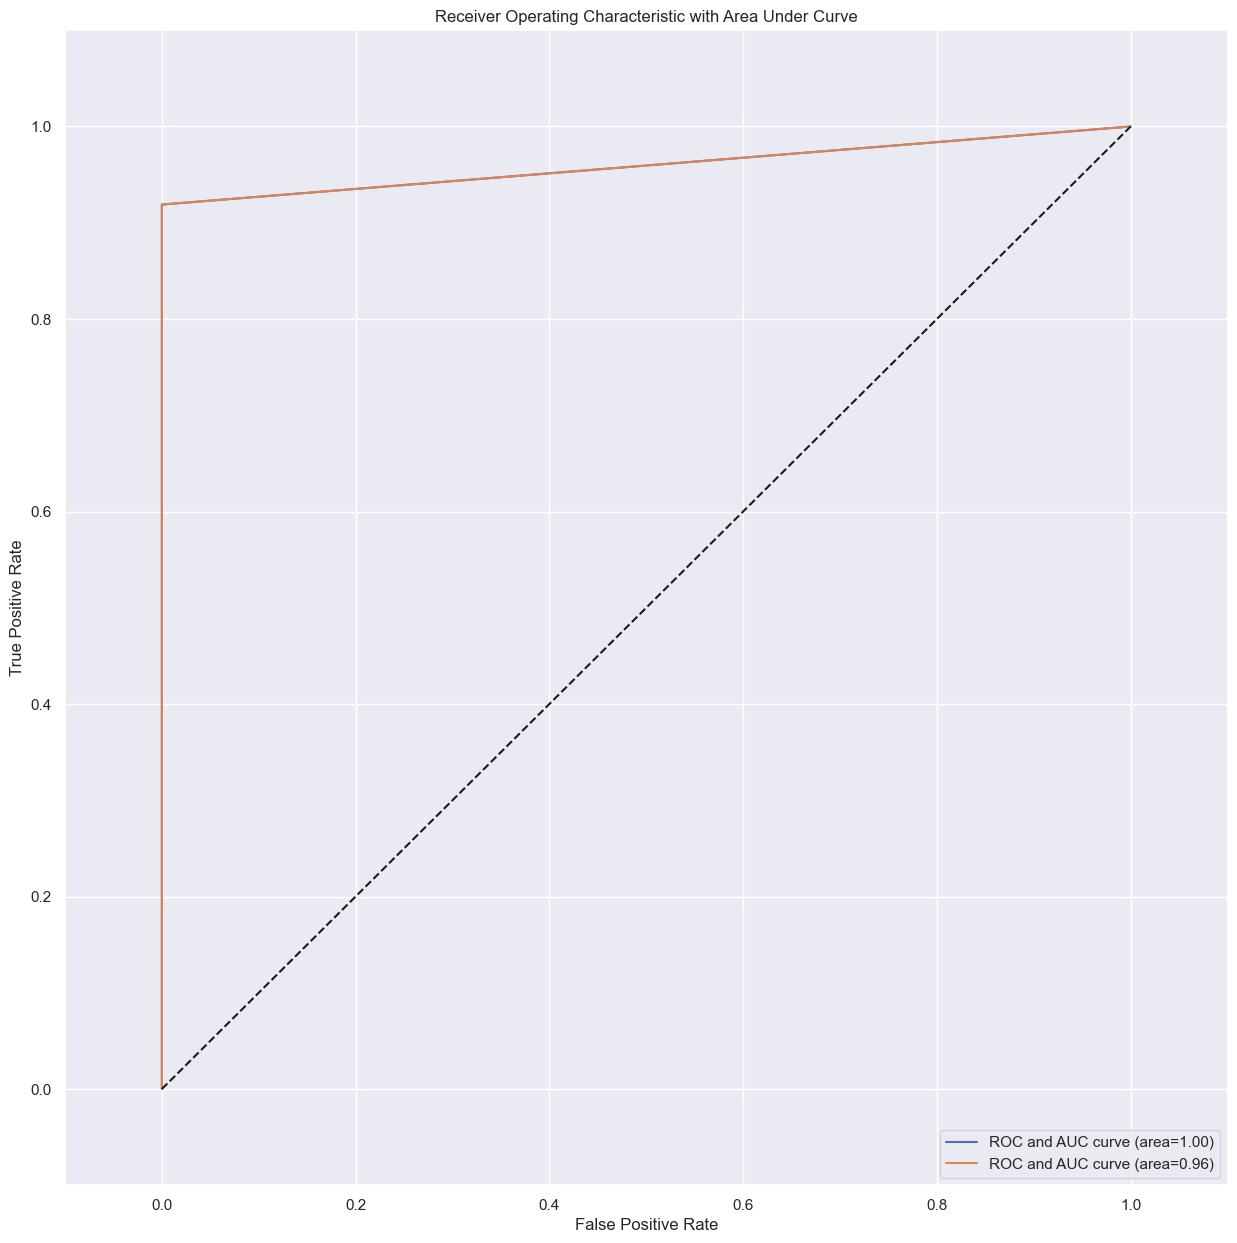

Training Avg Accuracy 0.9766666666666668

Test Avg Accuracy 0.96
************************************************************************************************************************
Evaluation Metrics for Random Forest Classifier
************************************************************************************************************************
Training Accuracy 1.0
****************
Test Accuracy 0.98
************************************************************************************************************************
For training data:


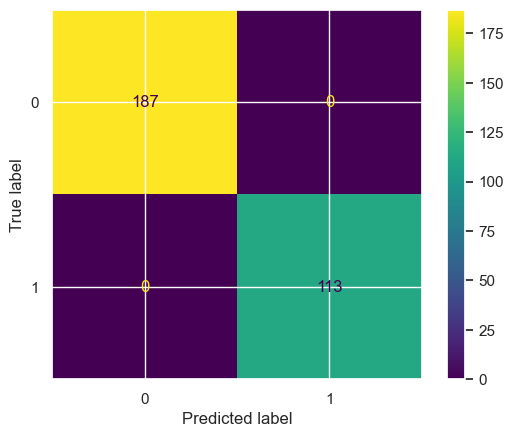

The classification data is: True Positives=113, False Positives=0, False Negatives=0, True Negatives=187
For testing data:


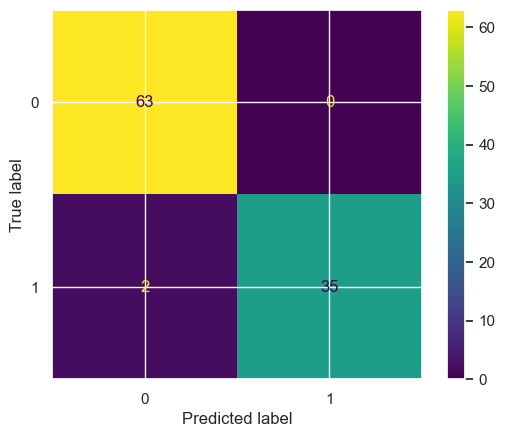

The classification data is: True Positives=35, False Positives=0, False Negatives=2, True Negatives=63
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       113

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

****************
****************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        63
           1       1.00      0.95      0.97        37

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

****************
***********************************************************************

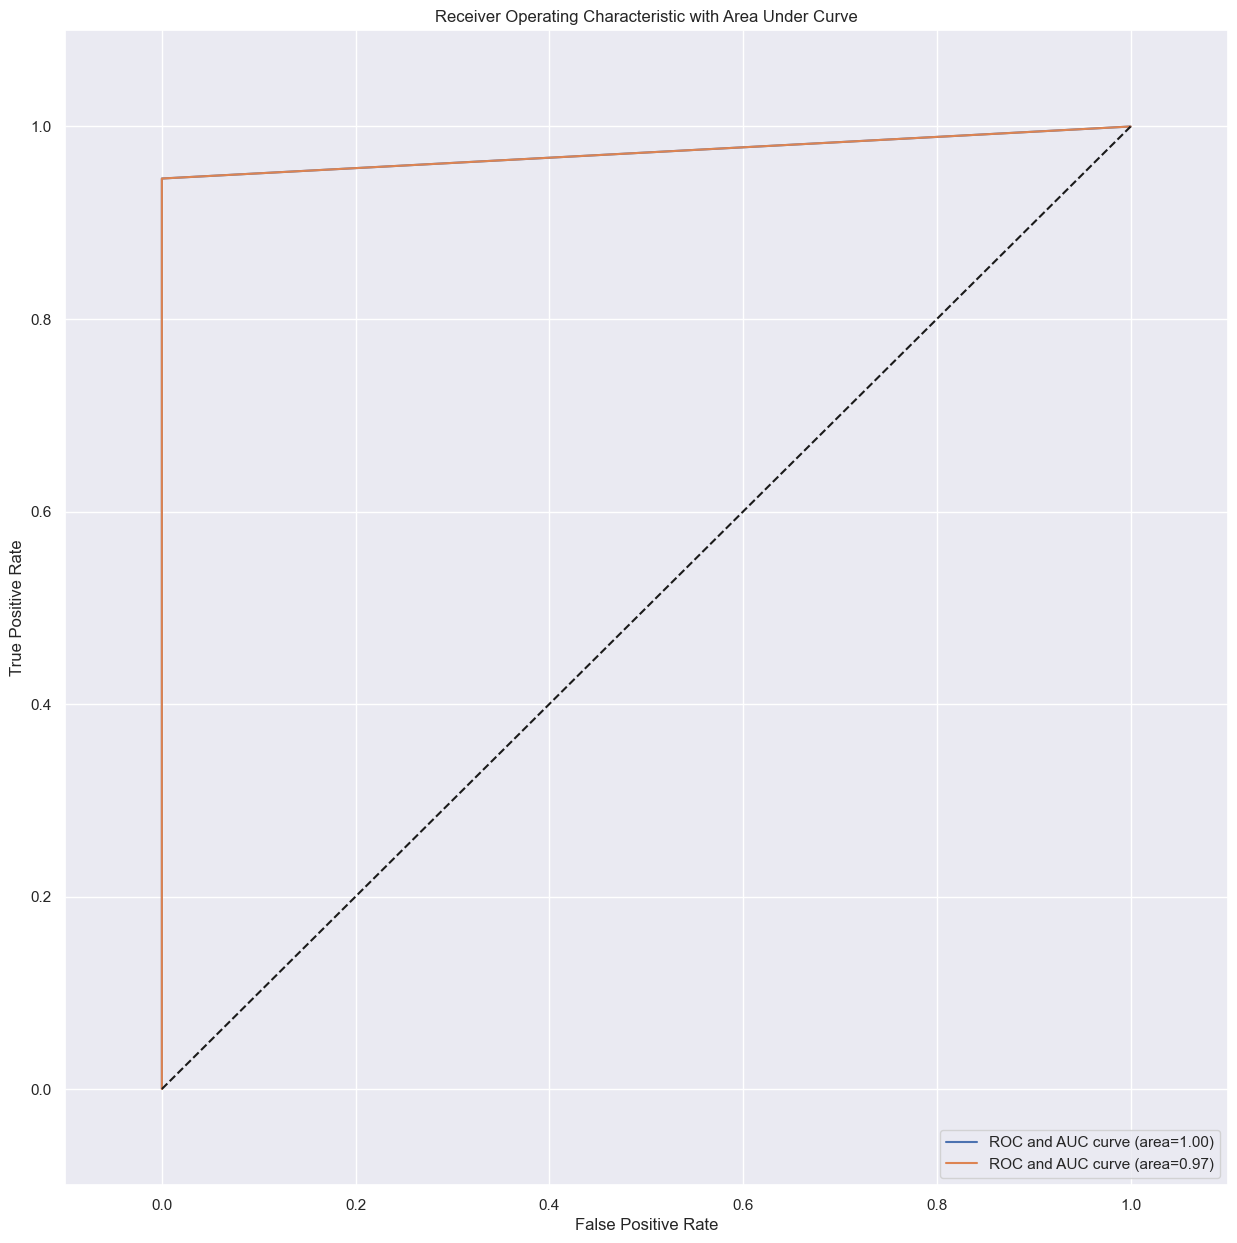

Training Avg Accuracy 0.9966666666666667

Test Avg Accuracy 0.99
************************************************************************************************************************
Evaluation Metrics for Bagging Classifier
************************************************************************************************************************
Training Accuracy 1.0
****************
Test Accuracy 0.97
************************************************************************************************************************
For training data:


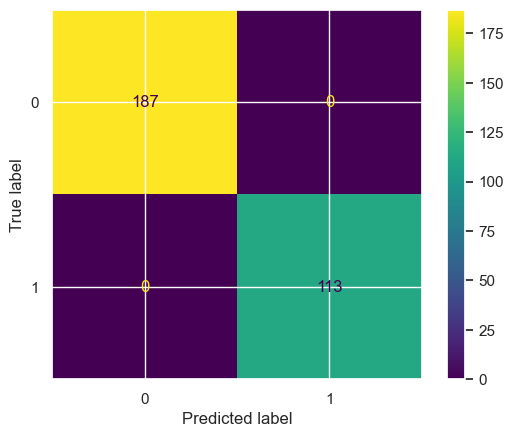

The classification data is: True Positives=113, False Positives=0, False Negatives=0, True Negatives=187
For testing data:


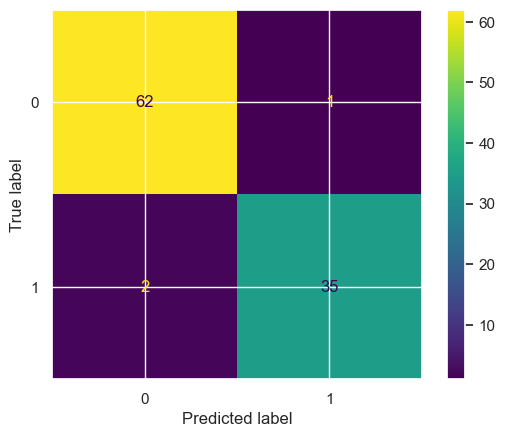

The classification data is: True Positives=35, False Positives=1, False Negatives=2, True Negatives=62
************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       113

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

****************
****************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.97      0.95      0.96        37

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

****************
***********************************************************************

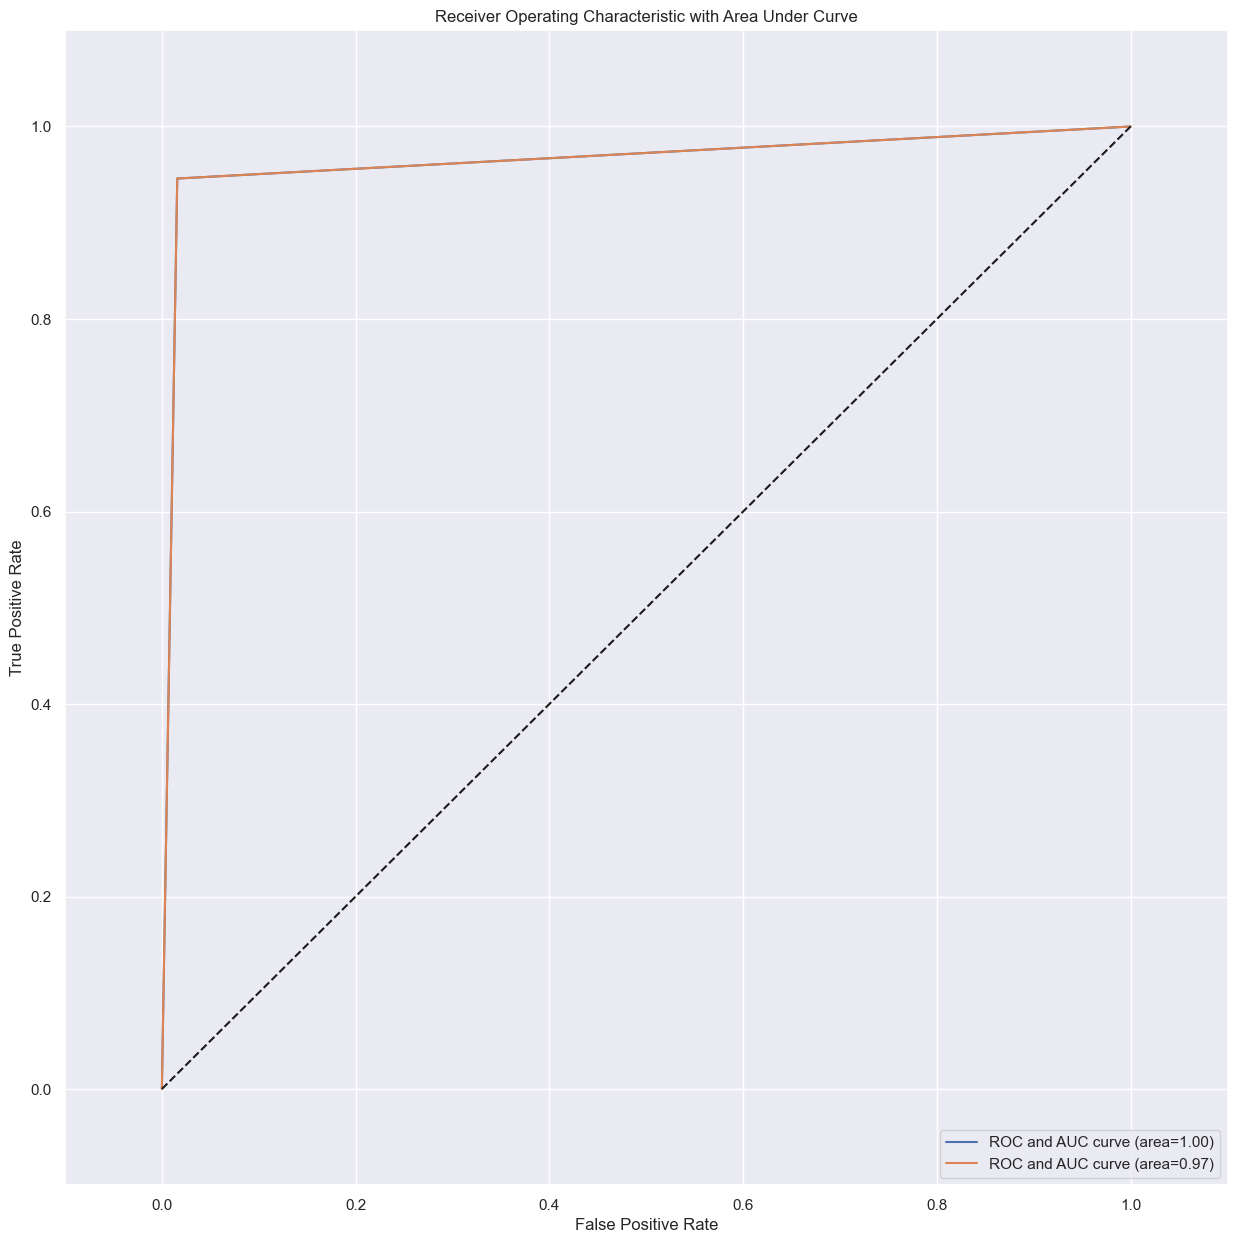

Training Avg Accuracy 0.9733333333333334

Test Avg Accuracy 0.96
************************************************************************************************************************


In [169]:
#Logistic regression 
logit=LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bagg = BaggingClassifier()


dict_models={logit: "Logistic Regression", dtc: "Decision Tree Classifier",
             rfc: "Random Forest Classifier", bagg: "Bagging Classifier"}

model_name=[]
precision_train=[]
recall_train=[]
f1score_train=[]


precision_test=[]
recall_test=[]
f1score_test=[]

var=[]
CV_test_acc=[]
CV_train_acc=[]


for model_instance, model in dict_models.items():
    model_instance.fit(x_train, y_train)
    y_pred_test=model_instance.predict(x_test)
    y_pred_train=model_instance.predict(x_train)
    
    
    
# Evaluation Metrics:   
    print(f"Evaluation Metrics for {model}")
    print("************************"*5)

    # Evaluation Accuracy
    acc_train= accuracy_score(y_train, y_pred_train)
    acc_test= accuracy_score(y_test, y_pred_test)
    print("Training Accuracy", acc_train)
    print("********"*2)
    print("Test Accuracy", acc_test)
    print("************************"*5)
    
    # Confusion matrix
    print("For training data:")
    cm_train = confusion_matrix(y_train, y_pred_train, labels = model_instance.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_instance.classes_)
    disp.plot()
    plt.show()
    tn, fp, fn, tp = cm_train.ravel()
    print(f"The classification data is: True Positives={tp}, False Positives={fp}, False Negatives={fn}, True Negatives={tn}")
#    sns.heatmap(cm_train, annot=True, cmap="Blues")    
    
    
    print("For testing data:")
    cm_test=confusion_matrix(y_test, y_pred_test, labels = model_instance.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model_instance.classes_)
    disp.plot()
    plt.show()
    tn, fp, fn, tp = cm_test.ravel()
    print(f"The classification data is: True Positives={tp}, False Positives={fp}, False Negatives={fn}, True Negatives={tn}")
    print("************************"*5)
#    sns.heatmap(cm_test, annot=True, cmap="Blues") 
#    sns.heatmap(cm_test/np.sum(cm_test), annot=True, fmt='.2%', cmap='Blues')

#    print(true_label=ith class, pred_label=jth class, where i is row and j is col)
    

# Classification report
    print(classification_report(y_train, y_pred_train))
    print("********"*2)
    model_name.append(model)
    precision_train.append("%.2f" % precision_score(y_train, y_pred_train)) # this way the precision is calculated for only the positive class (class 1)
    recall_train.append("%.2f" % recall_score(y_train, y_pred_train))
    f1score_train.append("%.2f" % f1_score(y_train, y_pred_train))
    print("********"*2)

    
    print(classification_report(y_test, y_pred_test))
    print("********"*2)
    precision_test.append("%.2f" % precision_score(y_test, y_pred_test))
    recall_test.append("%.2f" % recall_score(y_test, y_pred_test))
    f1score_test.append("%.2f" % f1_score(y_test, y_pred_test))
    print("************************"*5)
    
 
    
#Roc- Auc score and curve
    roc_auc_train=roc_auc_score(y_train, y_pred_train)
    roc_auc_test=roc_auc_score(y_test, y_pred_test)
    
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    
    print(thresholds)
    
    plt.figure(figsize=(15,15))
    for i in [roc_auc_train, roc_auc_test]:
        plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % i)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Characteristic with Area Under Curve")
    plt.legend(loc='lower right')
    plt.show()


# Cross Validation approach - K-Fold Method
    CV_acc_train = cross_val_score(model_instance, x_train, y_train, cv=10)
    CV_acc_test = cross_val_score(model_instance, x_test, y_test, cv=10)
    print("Training Avg Accuracy", (CV_acc_train.mean()))
    CV_train_acc.append("%.2f" % CV_acc_train.mean())
    print()
    print("Test Avg Accuracy", (CV_acc_test.mean()))
    acc_variance = CV_acc_train.mean() - CV_acc_test.mean()
    CV_test_acc.append("%.2f" % CV_acc_test.mean())
    var.append(acc_variance)
    print("************************"*5)




In [163]:
metrics={"Model": model_name, "Precision train": precision_train, "Precision test": precision_test,  "Recall train": recall_train, "Recall test": recall_test, "f1score train": f1score_train, "f1score test": f1score_test, "CV_train": CV_acc_train.mean(), "CV_test": CV_acc_test.mean(), "variance": var}
df_metrics=pd.DataFrame(data=metrics)
df_metrics    

Model Precision train Precision test Recall train  \
0       Logistic Regression            1.00           0.97         1.00   
1  Decision Tree Classifier            1.00           1.00         1.00   
2  Random Forest Classifier            1.00           1.00         1.00   
3        Bagging Classifier            1.00           0.85         1.00   

  Recall test f1score train f1score test  CV_train  CV_test  variance  
0        1.00          1.00         0.99      0.98     0.96  0.016667  
1        0.92          1.00         0.96      0.98     0.96  0.023333  
2        0.95          1.00         0.97      0.98     0.96  0.033333  
3        0.95          1.00         0.90      0.98     0.96  0.020000

In [ ]:
- By Jeel Raval

In [ ]:
# correct way to measure ROC curve is to use probabilities:




# model.predict(...) will give you the predicted label for each observation. That is, it will return an array full of ones and zeros.

# model.predict_proba(...)[:, 1] will give you the probability for each observation being equal to one. That is, it will return an array full of numbers between zero and one, inclusive.

# A ROC curve is calculated by taking each possible probability, using it as a threshold and calculating the resulting True Positive and False Positive rates. Hence, if you pass model.predict(...) to metrics.roc_auc_score(), you are calculating the AUC for a ROC curve that only used two thresholds (either one or zero). This is incorrect, as these are not the predicted probabilities of your model.

# To get the AUC of your model, you need to pass the predicted probabilities to roc_auc_score(...):

# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [ ]:
Q) if we are using predicted probability of class labels for finding roc curve, we dont have a concept of predicted probability for tree based models or knn or NB or SVM, then how to find roc curves for them? - Palash said to use confidence score.
# and palash confirmed that we use predicted probability to generate roc curve

# To see decision boundary

In [ ]:
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
# plt.title("Decision boundary for Logistic Regression (Train)")
# plt.xlabel("mean_perimeter")
# plt.ylabel("mean_texture");

In [ ]:
#Q) is the value of the model instance different after fitting and before fitting?



# Yes, the value of the model instance can be different before and after fitting. Here's why:

# 1. **Before Fitting:**
#    - When you create an instance of a machine learning model (e.g., a decision tree, a random forest, a linear regression model), it's like having an empty, uninitialized container. It has all the methods and attributes of the model, but it doesn't yet "know" anything about the data you want it to learn from.

# 2. **After Fitting:**
#    - Once you call the `fit` method with training data, the model "learns" from that data. It adjusts its internal parameters (like coefficients in linear regression or split criteria in decision trees) to best fit the training data. After fitting, the model is now trained and ready to make predictions.

# In a nutshell, the model instance is transformed from an uninitialized "blank slate" to a learned, predictive tool after fitting. It goes from being a template to a data-driven model.

# If you were to print the model instance before and after fitting, you might see differences in the internal parameters and attributes that were updated during the fitting process. This is particularly noticeable in models like linear regression where the coefficients are learned from the data.

In [ ]:
# Q) so can we use an already trained model_instance for CV where again it will be retrained?

# Yes, you can use an already trained `model_instance` for cross-validation. In fact, this is a common practice.

# Here's how it works:

# 1. **Initial Training:**
#    - You first train the model on a training dataset to learn the relationships in the data.

# 2. **Cross-Validation:**
#    - During each iteration of cross-validation, the model will be retrained on a different subset of the training data. This is done to simulate how the model would perform on unseen data.

#    - Even though the model has been trained initially, it's retrained during each fold of cross-validation to ensure it's adapting to different portions of the training data.

# Using an already trained model for cross-validation allows you to assess how well that specific model, with its learned parameters, generalizes across different subsets of the data.

# Remember, the goal of cross-validation is to obtain a robust estimate of the model's performance. By retraining the model in each fold, you're simulating how it will perform on new, unseen data in a more comprehensive way.

In [ ]:
# Q) you are confusing me. please help me clarify this. first of all, what is the difference between model_instance.fit(xtrain,ytrain) and model_instance.fit_transform(xtrain,ytrain)? Secondly, the model instance which has been trained using training data initially and has parameters according to that data is again retrained using the train and test separately while doing CV? Why do we need a trained model instance at the first place for CV when we are anyway gooing to retrain it during CV to find the new retrained parameters for that model instance while performing CV? Please let me know if I have errors in my understanding.

# I apologize for any confusion. It seems there might be a misunderstanding. Let me clarify:

# 1. **`model_instance.fit(x_train, y_train)` vs `model_instance.fit_transform(x_train, y_train)`**:

#    - `model_instance.fit(x_train, y_train)` is used for training a model. It takes the input features `x_train` and the corresponding target values `y_train` and learns the parameters of the model based on this training data.

#    - `model_instance.fit_transform(x_train, y_train)` typically applies to transformers in the context of feature preprocessing or engineering. It means the transformer both learns from the data (using `fit`) and transforms it (using `transform`) in a single step. Not all models support this method, as it's specific to transformers.

# 2. **Regarding Cross-Validation (CV):**

#    - In a typical CV process, you do not need to explicitly train the model beforehand. The purpose of CV is to evaluate how well a model generalizes to new, unseen data. Each fold of CV involves retraining the model on a different subset of the data, which simulates how the model will perform on new data.

#    - If you already have a pre-trained model, you can use it as a starting point in the CV process. However, keep in mind that during each fold of CV, the model will be retrained on a different subset of the training data, effectively adapting its parameters to that specific subset.

#    - The primary reason for using a pre-trained model in CV is to initialize it with certain parameters or settings that are known to work well. However, it will still be retrained on each fold.

# In summary, while a pre-trained model can be used as a starting point in CV, it will still be retrained on different subsets of the data during the CV process to assess its generalization performance. This is why using a pre-trained model in CV is not always necessary; you can start with an untrained model as well.

In [ ]:
# Q) so when we do model_instance.fit(xtrain,ytrain) what exactly happens and what happens to the model instance before and after fitting? Is there an option for model_instance.fit_transform(xtrain,ytrain) ? ANd if yes, then how is it different from .fit?


# Absolutely, let's clarify these concepts:

# ### `model_instance.fit(x_train, y_train)`

# When you use `model_instance.fit(x_train, y_train)`, you're instructing the model to learn from the training data (`x_train` are the features, `y_train` is the target variable).

# 1. **Before Fitting**:
#    - `model_instance` is like an empty vessel. It has all the necessary methods and attributes for a model, but it doesn't "know" anything about the data yet. It's essentially a template.

# 2. **After Fitting**:
#    - After you call `fit`, the model is trained using the provided data. This means it adjusts its internal parameters (like weights in a neural network, coefficients in linear regression, etc.) to best fit the training data. 

# ### `model_instance.fit_transform(x_train, y_train)`

# `fit_transform` is typically used with transformers, which are specific types of models that are primarily used for preprocessing or engineering features.

# 1. **`fit`**: 
#    - The `fit` part is the same as described above. It learns from the data.

# 2. **`transform`**:
#    - After learning from the data, a transformer also applies a transformation to the data. For example, in the case of a scaler, it might standardize the data (subtract the mean and divide by the standard deviation).

#    - `fit_transform` combines the learning (`fit`) and transformation (`transform`) steps into one. It's essentially a shorthand for calling `fit` followed by `transform`.

# ### Summary:

# - `model_instance.fit(x_train, y_train)` is used to train a model. It learns from the data.

# - `model_instance.fit_transform(x_train, y_train)` is used with transformers. It learns from the data and applies a transformation.

# - Not all models support `fit_transform` because it's specific to transformers.

# In practice, you would use `fit` for training predictive models (like regression, classification, etc.), and `fit_transform` for preprocessing steps that learn something from the data (like scaling, encoding categorical variables, etc.).

In [ ]:
# Q) what are transformers? can you give me examples of it?

# Transformers, in the context of machine learning, are models or components that are primarily used for data preprocessing or feature engineering. They learn from the data and apply a transformation to it. Here are some examples of transformers:

# 1. **Standard Scaler**:
#    - This transformer standardizes features by removing the mean and scaling to unit variance. It's particularly useful when features have different units or scales.

# 2. **Min-Max Scaler**:
#    - This transformer scales features to a specified range, usually [0, 1].

# 3. **One-Hot Encoder**:
#    - This transformer converts categorical variables into a set of binary columns (0 or 1) for each category. It's useful when you have categorical variables that don't have a natural ordinal relationship.

# 4. **Label Encoder**:
#    - This transformer converts categorical variables into numerical labels. It's used when there's an ordinal relationship between categories.

# 5. **PCA (Principal Component Analysis)**:
#    - While PCA is primarily a dimensionality reduction technique, it can be considered a transformer because it learns a transformation of the data that can be applied to new data.

# 6. **Imputers**:
#    - These transformers are used to fill missing values in the dataset. For example, the `SimpleImputer` in scikit-learn.

# 7. **Binarizer**:
#    - This transformer converts numerical values into binary values based on a threshold.

# 8. **Polynomial Features**:
#    - This transformer generates polynomial and interaction features. For example, it can turn a feature set like [a, b] into [1, a, b, a^2, ab, b^2].

# 9. **Text Vectorizers** (e.g., TF-IDF, CountVectorizer):
#    - These transformers convert text data into numerical vectors that can be used in machine learning models.

# 10. **Datetime Features Extractor**:
#     - This transformer extracts information from datetime variables, like year, month, day, etc.

# Transformers are crucial for preparing data for machine learning models. They ensure that the data is in a suitable format and that it captures the relevant information needed for the model to learn from. Keep in mind that not all models in scikit-learn support the `fit_transform` method, so transformers are typically used in preprocessing pipelines.

In [ ]:
# so fit_transform actually transforms the data thet we give as input, 
# but .fit just simply learns from the data and modifies the internal parameters 
# of the model according to the data so that mean fitting or training a model

In [ ]:
# Q) but my question is, do we perform cross validation on the x_train,y_train data and also separately perform a cross validation on the x_test,y_test data and then compare the average accuracies obtained from these two cross validations to see if the model generalizes well? 

# I see, I apologize for misunderstanding your question earlier. Let me clarify:

# Cross-validation is typically performed on the training data (x_train, y_train) to assess the model's performance during the development and tuning phase. It involves splitting the training data into multiple subsets (folds) for training and validation.

# After you have finalized and validated your model using cross-validation on the training data, you do not perform a separate cross-validation on the test data (x_test, y_test). Instead, you use the original test set (x_test, y_test) to evaluate the final performance of your model.

# The reason for this is that the test set should be completely unseen by the model during the development phase. It serves as a final, unbiased evaluation of how well your model is likely to perform on completely new, unseen data.

# In summary:

# 1. Perform cross-validation on the training data (x_train, y_train) for model development and hyperparameter tuning.

# 2. Once you've finalized and validated your model, evaluate its final performance using the original test set (x_test, y_test). This test set should not have been used in any way during the development phase.

# Comparing the performance of your model on the training data (using cross-validation) and the test data provides insight into how well your model is likely to generalize to new, unseen data. The model's performance on the test set gives you confidence in its ability to make accurate predictions in a real-world scenario.

In [ ]:
# plotting of bar plot for the comparison of precision, recall, f1score, accuracy

In [163]:
metrics={"Model": model_name, "Precision train": precision_train, "Precision test": precision_test,  "Recall train": recall_train, "Recall test": recall_test, "f1score train": f1score_train, "f1score test": f1score_test, "CV_train": CV_acc_train.mean(), "CV_test": CV_acc_test.mean(), "variance": var}
df_metrics=pd.DataFrame(data=metrics)
df_metrics    

Model Precision train Precision test Recall train  \
0       Logistic Regression            1.00           0.97         1.00   
1  Decision Tree Classifier            1.00           1.00         1.00   
2  Random Forest Classifier            1.00           1.00         1.00   
3        Bagging Classifier            1.00           0.85         1.00   

  Recall test f1score train f1score test  CV_train  CV_test  variance  
0        1.00          1.00         0.99      0.98     0.96  0.016667  
1        0.92          1.00         0.96      0.98     0.96  0.023333  
2        0.95          1.00         0.97      0.98     0.96  0.033333  
3        0.95          1.00         0.90      0.98     0.96  0.020000

In [ ]:
#Q) How do we know which class is assigned 0 and which is assigned 1? check the label encoding here to identify this.

In [ ]:
# Q) WHy is the precision and recall and f1 score for the bagging classifier not matching.
# Q) Understand the classification report thoroughly again.

In [ ]:
#precision= TP/TP+FP

In [ ]:
#recall=TP/TP+FN

In [ ]:
# draw precision recall curves
# draw decision boundary and data separation
# check if you understand everything about this project
#change the threshold to change precision recall and accuracy

In [ ]:
# find feature importance for rf just like dt

In [ ]:
#lr

In [121]:
#y_pred_lr

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int8)

In [122]:
#lr.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int8)

In [124]:
#y_pred_lr + lr.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2], dtype=int8)

In [ ]:
#tonight:

In [ ]:
# fit the logistic curve here to see what happens and what data is actually fit
# also fit the probability values
# also fit log odds vs the features x weights straight line to see how well the model is fit.
# show summary report of classification problem just like that in regression to get the p value.

# in regression show a 2d fit reg plot to the data and in classification problems like logistic or any other show what the model is exactly fitting. 
# in DT and RF the fitting is finding the decision boundary, so show that plot.
# do hyperparam for dt and rf
# dt and rf for multiclass
# for german data, try to do dt feature selection for overfitting and based on feature selection, choosing the max depth or max features.
# dropping unnecessary cols at the start which are not needed for model building

In [ ]:
# start the project with checking the datatype of each ol

In [ ]:
# Hyperparameter tuning

In [ ]:
# Accuracy score, ROC/AUC score, classification chart

In [ ]:
# then if in the end if recall and precision are not good, then try to change the threshold value here.

In [ ]:
Certainly! Let's break down the given command with a small example:

Suppose you have a DataFrame `df` that contains information about passengers on a ship, and you want to group them by their class ('First', 'Second', 'Third') and survival status ('Survived', 'Not Survived').

Here's a simplified example DataFrame:

```
   class  survived
0  First  Survived
1  First  Not Survived
2  Second Survived
3  Second Not Survived
4  Third  Survived
5  Third  Not Survived
```

Now, let's break down the command:

```python
df_plot = df.groupby(['class', 'survived']).size().reset_index().pivot(columns='class', index='survived', values=0)
```

1. `df.groupby(['class', 'survived']).size()`: This groups the DataFrame `df` by the 'class' and 'survived' columns and calculates the size of each group (number of occurrences). This results in a Series with a MultiIndex (class and survived) and the corresponding size.

2. `.reset_index()`: This resets the index of the grouped Series, converting it back into a DataFrame. The result will have columns 'class', 'survived', and the calculated size.

3. `.pivot(columns='class', index='survived', values=0)`: This pivots the DataFrame using the 'class' column as columns, 'survived' column as index, and the calculated size as values. This reshapes the DataFrame to have 'class' as columns, 'survived' as index, and the size values indicating the count of passengers in each class and survival status combination.

So, using the example DataFrame, after applying the command:

```
         First  Second  Third
survived                      
Not Survived      1       1      1
Survived          1       1      1
```

This resulting DataFrame `df_plot` gives you a tabular view of the count of passengers for each class and survival status combination.

# To understand Stack() Unstack()
original dataframe:
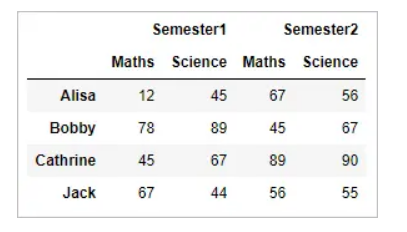

after stacking:  column labels are converted to row labels. Stacking can happen be done for diff levels of col labels. but unstacking can be done only for the innermost row labels.
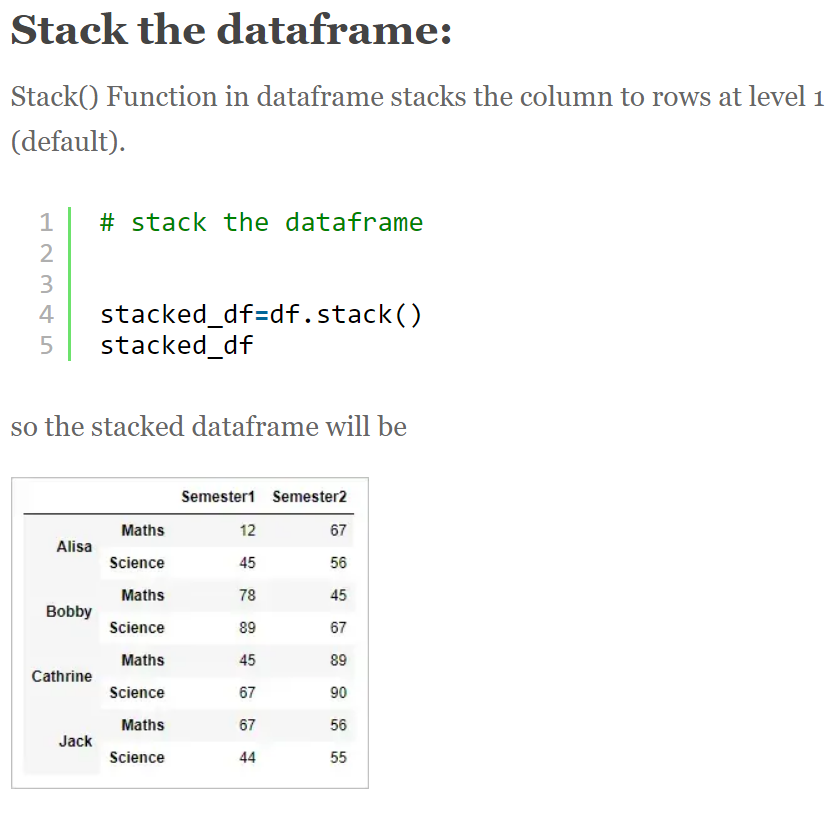

after unstacking: innermost row laels are converted to column labels
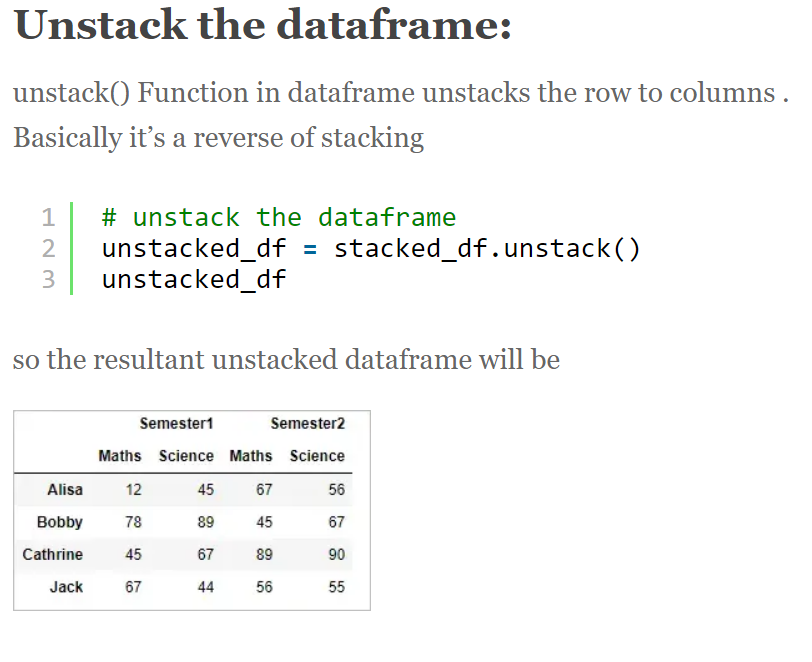

******************
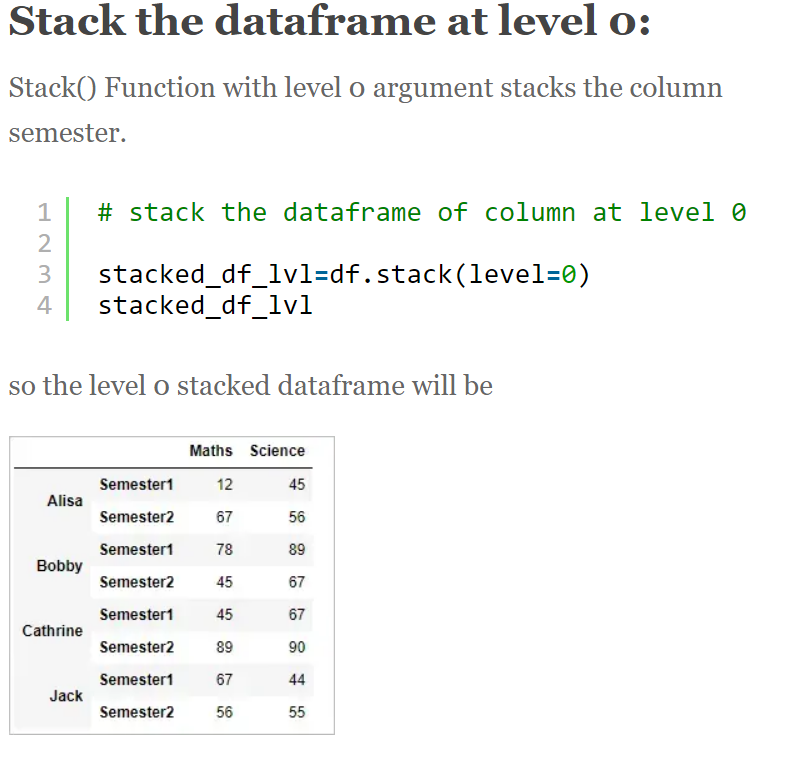
*****************
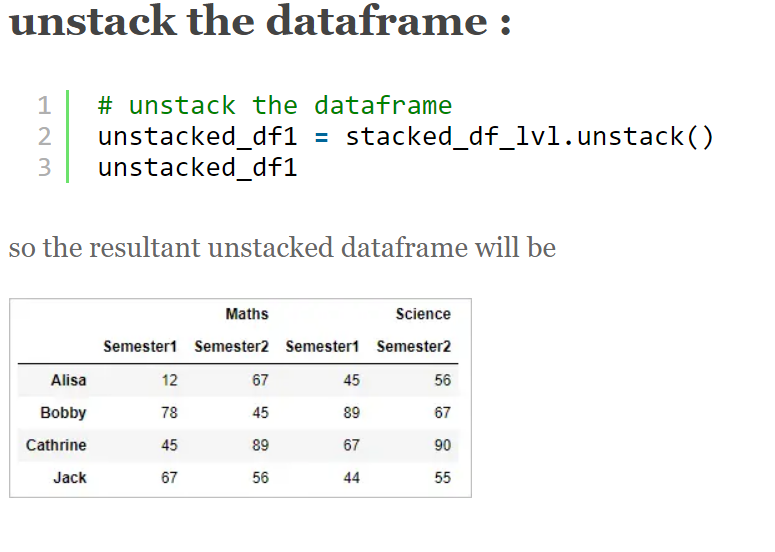

In [ ]:
Certainly! Let's break down the given command with a small example:

Suppose you have a DataFrame `df` that contains information about passengers on a ship, and you want to group them by their class ('First', 'Second', 'Third') and survival status ('Survived', 'Not Survived').

Here's a simplified example DataFrame:

```
   class  survived
0  First  Survived
1  First  Not Survived
2  Second Survived
3  Second Not Survived
4  Third  Survived
5  Third  Not Survived
```

Now, let's break down the command:

```python
df_plot = df.groupby(['class', 'survived']).size().reset_index().pivot(columns='class', index='survived', values=0)
```

1. `df.groupby(['class', 'survived']).size()`: This groups the DataFrame `df` by the 'class' and 'survived' columns and calculates the size of each group (number of occurrences). This results in a Series with a MultiIndex (class and survived) and the corresponding size.

2. `.reset_index()`: This resets the index of the grouped Series, converting it back into a DataFrame. The result will have columns 'class', 'survived', and the calculated size.

3. `.pivot(columns='class', index='survived', values=0)`: This pivots the DataFrame using the 'class' column as columns, 'survived' column as index, and the calculated size as values. This reshapes the DataFrame to have 'class' as columns, 'survived' as index, and the size values indicating the count of passengers in each class and survival status combination.

So, using the example DataFrame, after applying the command:

```
         First  Second  Third
survived                      
Not Survived      1       1      1
Survived          1       1      1
```

This resulting DataFrame `df_plot` gives you a tabular view of the count of passengers for each class and survival status combination.